In [9]:
import pickle as pkl
import numpy as np
import pandas as pd
import random
import requests as rq
import json
import networkx as nx

import matplotlib.pyplot as plt
# %matplotlib inline
import seaborn as sns
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib.cm as cm
from empath import Empath
import math
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sys
import pyLDAvis
import pyLDAvis.gensim
import operator
stdout = sys.stdout
#reload(sys)
#sys.setdefaultencoding('utf-8')
sys.stdout = stdout
import csv
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [10]:
nx.__version__

'1.11'

In [ ]:
pyt

In [10]:
plt.style.use('seaborn-white')

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12

In [11]:
import logging
logger = logging.getLogger()
fhandler = logging.FileHandler(filename='../Logs/ReplyGraphAnalysis.log', mode='a')
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
fhandler.setFormatter(formatter)
logger.addHandler(fhandler)
logger.setLevel(logging.DEBUG)

In [12]:

Allgraphs_SW = "../Data/reddit_suicideWatch/SW_allValidThreads_graphs/SW_Allvalid_Graphs_Depth_fixed.pkl"
Allgraphs_Dep1 = "../Data/reddit_depression_dump/graphs/depression_replygraphs.pkl"
Allgraphs_Dep2 = "../Data/reddit_depression/graphs/depression_replygraphs.pkl"
Allgraphs_BL = "../Data/FrontPage/graphs/frontPage_replygraphs_50k.pkl"

In [13]:
def filterGraphs(graphs, nodes_thresh):
    filt_Graphs= {}
    for k in graphs:
        if len(graphs[k]) > nodes_thresh:
            filt_Graphs[k] = graphs[k]
    return filt_Graphs
        

def sampleGraphs(graphDict, sampleSize):
    sampled = {}
    keys = graphDict.keys()
    sampledKeys = random.sample(keys,sampleSize)
    for k in sampledKeys:
        sampled[k] = graphDict[k]
    return sampled

import csv
def writeTextDict(textDict,fileName):
    fieldnames = ['postid', 'text']
    with open(fileName, 'wb') as output_file:
        dict_writer = csv.DictWriter(output_file, fieldnames=fieldnames)
        dict_writer.writeheader()
        for k in textDict:
            dict_writer.writerow({'postid': k , 'text': textDict[k]})


def getTextDict(replyGraphs):
    textDict = {}
    for k in replyGraphs:
        postText = nx.get_node_attributes(replyGraphs[k],'text')
        textDict.update(postText)
    return textDict

def readModeratorFile(f):
    modIds = []
    modMeta = []
    js = json.load(open(f,'rb'))
    data = js['data']['children']
    for k in data:
        modIds.append(k['name'])
        modMeta.append(k)
    return modIds, modMeta

In [17]:
Graphs_SW = pkl.load(open(Allgraphs_SW,'rb'))

Graphs_BL = pkl.load(open(Allgraphs_BL,'rb'))

Graphs_dep = pkl.load(open(Allgraphs_Dep1,'rb'))
Graphs_dep2 = pkl.load(open(Allgraphs_Dep2,'rb'))

UnicodeDecodeError: 'ascii' codec can't decode byte 0xc2 in position 215: ordinal not in range(128)

In [8]:
len(Graphs_SW) , len (Graphs_BL)

(50754, 49773)

In [9]:
total_numbers = [len(Graphs_SW[G].nodes()) for G in Graphs_SW]
print sum(total_numbers)
                     

419555


In [10]:
total_numbers = [len(Graphs_BL[G].nodes()) for G in Graphs_BL]
print sum(total_numbers)

3011765


In [11]:
Graphs_dep.update(Graphs_dep2)

In [12]:
allGraphs_SW = filterGraphs(Graphs_SW , 10)

allGraphs_BL = filterGraphs(Graphs_BL , 10)

allGraphs_Dep = filterGraphs(Graphs_dep , 8)

len(allGraphs_SW) , len(allGraphs_BL) , len(allGraphs_Dep)

(11437, 36080, 1298)

In [13]:
# sampled_BL = sampleGraphs(allGraphs_BL,len(allGraphs_SW))
sampled_SW = allGraphs_SW #sampleGraphs(allGraphs_SW,10000)

In [14]:
# pkl.dump(sampled_BL,open("../Data/sampled_BL_reply.pkl",'wb'),protocol=pkl.HIGHEST_PROTOCOL)

In [15]:
sampled_BL = pkl.load(open("../Data/sampled_BL_reply.pkl",'rb'))

In [16]:
sampled_Dep = allGraphs_Dep

In [17]:
textDict_SW = getTextDict(sampled_SW)

textDict_BL = getTextDict(sampled_BL)

textDict_Dep = getTextDict(sampled_Dep)

In [18]:
len(textDict_SW), len(textDict_BL) , len(textDict_Dep)

(232336, 897673, 35924)

In [19]:
# writeTextDict(textDict_Dep,'../Data/Dep_Text_8plus.csv')

In [20]:
# writeTextDict(textDict_BL,'../Data/FrontPage/FP_Alltext_V4.csv')

In [21]:
# writeTextDict(textDict_SW,'../Data/reddit_suicideWatch/SW_Alltext_V3.csv')

In [22]:
SW_mods, SW_modMeta = readModeratorFile("../Data/reddit_suicideWatch/moderators.json")

In [23]:
print SW_mods, len(SW_mods)

[u'S2S2S2S2S2', u'qgyh2', u'Psy-Kosh', u'SicSemperHumanus', u'SQLwitch', u'UnDire', u'pkbooo', u'skyqween', u'MykeeB', u'circinia', u'svabhava-sunya', u'sofar1776'] 12


In [24]:
SW_modMeta[1]

{u'author_flair_css_class': None,
 u'author_flair_text': None,
 u'date': 1230644033.0,
 u'id': u't2_1uzpp',
 u'mod_permissions': [u'all'],
 u'name': u'qgyh2'}

In [25]:
import datetime
times = [datetime.datetime.fromtimestamp(int(k['date'])).strftime('%Y-%m-%d %H:%M:%S')  for k in SW_modMeta  ]

In [26]:
print times

['2008-12-16 13:46:24', '2008-12-30 13:33:53', '2010-01-10 17:51:57', '2010-09-09 08:16:49', '2010-09-16 04:17:50', '2011-12-11 21:53:18', '2012-02-08 01:47:35', '2012-09-16 21:45:42', '2013-11-17 13:10:44', '2014-06-05 02:57:29', '2014-07-08 12:15:35', '2017-11-12 00:53:36']


In [27]:
AS_mods = readModeratorFile("../Data/reddit_TheDonald/moderators.json")

In [28]:
len(AS_mods)

2

In [29]:
# LIWC_BL2 = pd.read_csv("/datasets_1/sagarj/IoPPN_collab/reddit_TheDonald/LIWC2015_TheDonaldTop.csv")
LIWC_BL = pd.read_csv("/datasets_1/sagarj/IoPPN_collab/FrontPage/LIWC2015_FP_Alltext_V4.csv")
# LIWC_SW = pd.read_csv("/datasets_1/sagarj/IoPPN_collab/reddit_suicideWatch/LIWC2015_SWTextComplete.csv")
LIWC_SW = pd.read_csv("/datasets_1/sagarj/IoPPN_collab/reddit_suicideWatch/LIWC_SW_Alltext_V2.csv")
LIWC_Dep = pd.read_csv("/datasets_1/sagarj/IoPPN_collab/LIWC_Dep_Text_8plus.csv")

In [30]:
LIWC_SW.keys()

Index([u'A', u'B', u'WC', u'Analytic', u'Clout', u'Authentic', u'Tone', u'WPS',
       u'Sixltr', u'Dic', u'function', u'pronoun', u'ppron', u'i', u'we',
       u'you', u'shehe', u'they', u'ipron', u'article', u'prep', u'auxverb',
       u'adverb', u'conj', u'negate', u'verb', u'adj', u'compare', u'interrog',
       u'number', u'quant', u'affect', u'posemo', u'negemo', u'anx', u'anger',
       u'sad', u'social', u'family', u'friend', u'female', u'male', u'cogproc',
       u'insight', u'cause', u'discrep', u'tentat', u'certain', u'differ',
       u'percept', u'see', u'hear', u'feel', u'bio', u'body', u'health',
       u'sexual', u'ingest', u'drives', u'affiliation', u'achieve', u'power',
       u'reward', u'risk', u'focuspast', u'focuspresent', u'focusfuture',
       u'relativ', u'motion', u'space', u'time', u'work', u'leisure', u'home',
       u'money', u'relig', u'death', u'informal', u'swear', u'netspeak',
       u'assent', u'nonflu', u'filler', u'AllPunc', u'Period', u'Comma',
     

In [31]:
print len(LIWC_SW) , len(LIWC_BL), len(LIWC_Dep)

419554 2932701 35924


In [32]:
LIWC_SW.drop(LIWC_SW.index[0])
LIWC_BL.drop(LIWC_BL.index[0])
LIWC_Dep.drop(LIWC_Dep.index[0])

A                                                  B   WC  \
1       t1_c3o6v03                   like a pet or an office fixture.    7   
2       t1_cbtq88z  I'm also 15, going 16 in a few days. We can ch...   33   
3       t1_c19qzti  I love your insight that depression thrives in...  370   
4       t1_cgrrngb  I have found cbt very useful. First of all in ...  370   
5       t1_cjrfjal  Anytime. You wanna rant about something? Shoot...   37   
6       t1_c8sk7f5                                          [deleted]    1   
7       t1_csg5e3g  True, and things just become harder to deal wi...   29   
8       t1_c7htg2r  Please... explain it to me in detail, why me w...   69   
9       t1_cuk8wn5  i'm not asking for a push in the suicide direc...   26   
10      t1_c397zq7                                   You're welcome.     2   
11      t1_cdfz2l5  Damn.Yeah. I am basically crippled emotionally...  150   
12      t1_cafiyz0  I've been there, right in your darkest moments...  196   
13      t1_ctkv7j8  The problem is that I'm so anti-social that no...   34   
14      t1_c2nbnpa  It's been proposed before... I think a potenti...   18   
15      t1_c7v3icn                                          [removed]    1   
16      t1_cn2be27                                          Thanks :)    2   
17      t1_caglxac  I have direct experience with the guilt of a l...  200   
18      t1_c61jzyf  You can only want the ones that want you...  M...   15   
19       t3_2tfsat  Today I feel perfectly worthless today.  Is th...   18   
20      t1_c2ggmbw  I don't care if i understand life anymore, who...   41   
21      t1_cpgvyy8                                          [deleted]    1   
22       t3_2dc408  I've been depressed for my entire life. Its be...  183   
23      t1_c7g5x8h  I forgot to mention my SO raped me when they f...   67   
24      t1_c15vmem  I really like it a lot and I appreciate what i...   14   
25      t1_ck36zdy                       Obstetrician. I am pregnant.    4   
26      t1_ce9o13b  I'm so sorry you're going through all of this,...  237   
27      t1_c5rugtp  Please don't do it. I read your post on /r/mus...   26   
28      t1_c51lbzd  In the grand scheme of things, I'm simply drag...   52   
29      t1_cermz7l  Honestly, it was scary - but after many years ...  119   
30      t1_c3t0ae7  That's good man. Additionally, I like to think...   47   
...            ...                                                ...  ...   
419524  t1_clty8er  Thing in my current place is that there is som...  106   
419525   t3_2z3z9w  Even more so for posting here, I have been bat...  761   
419526  t1_c0bl85e  here's a [mood disorder self-help group in nyc...  104   
419527  t1_c3873ky  That didn't happen. Nobody called the cops on ...   23   
419528  t1_cdib875  This is actually cheered me up a lot. I'll be ...   22   
419529  t1_c2fqftn  The times when you feel down and out are the t...   19   
419530  t1_cmtjh42  Hey there. Wow, I'm really sorry you went thro...  144   
419531   t3_1jv3t8  Why not? I'm 20 x years old and I just don't s...  303   
419532  t1_cgaa66b  G'day again! :)Did you have to walk home in th...  113   
419533  t1_ckcu1yp  Ah I feel you there... It seems like you both ...   51   
419534   t3_14488i                                          [deleted]    1   
419535  t1_c843fa5                                I feel the same way    5   
419536  t1_cg5yixf  Trust me, your parents would rather be angry a...   88   
419537  t1_coc1avx  It has to be hard dealing with your parents de...   20   
419538  t1_c6e0ehy  There's nothing better in relationships than s...   46   
419539  t1_carq2t3  I wish it were as easy as encouraging you to c...  352   
419540  t1_c18vm9m                                          [deleted]    1   
419541  t1_c18vm9j  "I cannot simply choose the pain any more than...   75   
419542  t1_cg5e8f5  I appreciate that. I just really thought she w...   45   
419543  t1_crztuy0  Sorry to hear that.

A                                                  B   WC  \
1        t1_duqxily  None if them has won gold (only other medals) ...   31   
2        t1_dumknhz  suppose if china is going to artificially lowe...   32   
3        t1_dumknhd      Look at Chicago, what more proof do you need?    9   
4        t1_dupg974                                        Stationery*    1   
5        t1_duljt22  Isso me incomoda muito.Gaste 300 reais pra com...   31   
6        t1_durb5jy  Because the majority of people living in the c...   20   
7        t1_duit3vg  My pc is too trash  to record and play at a st...   26   
8        t1_dv6ur8x  The boy who held back the sea. Basically a you...   58   
9        t1_dujrr20  That you don't just wake up in a parallel univ...   16   
10       t1_dumek8p  God, do these people have *no* shame?  Why in ...   69   
11       t1_dumek8q  Bit harder for a non-US citizen. We need your ...   36   
12       t1_dv97qmb                            OP finally got pussy.      4   
13       t1_dv4ywam  If I could figure out how to give gold you wou...   18   
14       t1_dv97qmf                               Swiss Mathematician?    2   
15        t3_7ymlcg                                                NaN    0   
16       t1_dv4ywah  Oh man this comment got me good.  Thanks you p...   15   
17       t1_duljt2i  Happened to me yesterday with the same gun! Th...   33   
18       t1_dupg97a  they didn't shout anti bjp slogans they shoute...   20   
19       t1_dunkwfc                             Oh shit dude sorry...     4   
20       t1_dunkwfb  Maybe you should go into electrical repair, yo...   15   
21       t1_duuvx6r  That's why I lowkey think it'll be revealed co...   36   
22       t1_dupg97g  That's one way for a kid to start getting moni...   10   
23       t1_dv82pa9  No plans to change up WAYWT - Mon/Fri are sort...   18   
24       t1_duljt2b  What if the bit about him receiving/using a ch...  115   
25       t1_dunkwfk                       This is awesome!  Thank you!    5   
26       t1_dunkwfj  I like it too - not for my pale ass self, but ...   24   
27       t1_duljt2g  It's generally considered a multi day climb an...   39   
28       t1_dv1pmh1  There arent a lot of 104 custom boards around ...   21   
29       t1_dupg97r  Shoulds don't matter much.Schools *are* being ...   13   
30       t1_dupg97y  Urging someone to listen is definitely differe...   59   
...             ...                                                ...  ...   
2932671  t1_dutyr9q         On advice of council I am pleading a fifth    9   
2932672  t1_duqwvp8  I cant believe i had to scroll down this far t...   16   
2932673  t1_dv55pxg  Were you expecting a rebuttal? Your post made ...   92   
2932674  t1_duv9ga2  I think you should look harder at other aspect...   20   
2932675  t1_duki7f1  2.66 is actually not terrible.  Field journals...   36   
2932676  t1_duv9ga6                    Could ironically call it George    5   
2932677  t1_duv9ga9  After last year, Viru wanted an Indian captain...   29   
2932678  t1_dv8p634                              Anyone remember AMES?    3   
2932679  t1_duskjj5                            It's Ewan McGregor then    4   
2932680  t1_duskjj4  I'm gonna be honest I could barely hear the ly...   17   
2932681  t1_dvaqiut  You got the second part correctly but the firs...  118   
2932682  t1_duvdr9k  Simmons is shooting 56% from the FT line and h...   41   
2932683  t1_duwhdoi                                     to the top sir    4   
2932684  t1_duvdr9l                                             Probs?    1   
2932685  t1_dv6l7du  Firstly, he didn't steal anything. There was l...   26   
2932686  t1_dupyuai                                  40 oz. to freedom    4   
2932687  t1_dv6l7dw                        It's almost a perfect loop.    5   
2932688  t1_dupyuak  No. It's far easier to sell yourself than to k...   23   
2932689  t1_dujzp8u  Flush the casings out completely.  I flush the.

A                                                  B   WC  \
1      t1_eda078w  What do you mean by “put forth the effort?” Th...   31   
2      t1_dfbppnw  Checking in. Today I hugged my cat and it felt...   20   
3      t1_de0uooi  Your smile is beautiful you should show it off...   13   
4      t1_dde4cbp  They'll suck out your life, your money and eve...   18   
5      t1_dd5rjst  Girlfriend and you guys. But I don't think I n...   35   
6      t1_ddffkpz  Hm. Last Disney movie I saw everyone died at t...   11   
7      t1_ed9smb2  Welcome to the club. Pretty much the reason I ...   19   
8      t1_dcx5jyd  I come back to your post time and time again h...   16   
9      t1_ddadthr                                    I sure hope so.    4   
10     t1_dd2t17x  My thoughts for the past few weeks into words....   32   
11     t1_d7n4v5z  I've written paragraphs upon paragraphs on sev...   18   
12     t1_de8c78z  Im scared to talk to my bf about it bc i dont ...   70   
13     t1_d7o16e4                                      all.the.time     3   
14     t1_dcx0gbw  I seriously don't get how some guys can think ...  120   
15     t1_ddxc83j  Is there anything I can do to help? Maybe talk...   15   
16     t1_deai7iu  Lying in bed in the middle of the afternoon on...   18   
17     t1_dd9lxgf  If I had a nickel for every time people said t...   26   
18     t1_ddbza5e  Hi u/Sebas_sh, I'm agreeing with everyone here...  335   
19     t1_dcnws1o  So I found out my $30 copay can cover  therapy...   77   
20     t1_ddsbu0k  That's really interesting and sad... but it do...   10   
21     t1_ddmi89n                                          [removed]    1   
22     t1_dddgql1  Wait that sounds AWESOME! You seem really pass...   17   
23     t1_ddg5rsb  Pretty much? It does come with some weird emot...   32   
24     t1_dfbkmj3  My therapist wants me to face it and make plan...   36   
25     t1_ddczgph  I tend to isolate myself to escape the negativ...  242   
26     t1_dd7qojt            consulting, government, industry maybe     4   
27     t1_de3rvft                           No I hated my childhood     5   
28     t1_dd9te8l  I disagree i do try but get made to feel like ...   13   
29     t1_de83l9y  Sorry for the late reply, I was having some mu...  171   
30     t1_deamq60                                          [deleted]    1   
...           ...                                                ...  ...   
35894  t1_dd6uno3                                          [deleted]    1   
35895  t1_de4k9bo  It depends. If OP gets one that pulls him alon...   50   
35896  t1_ed8q6qg  Thank you. Iunno how I managed to find him. Wh...   26   
35897  t1_ed2mrlf  I don't even want to remember anything of 2018...   10   
35898  t1_dcnxpm9  My 2016 felt that way - I lost hope and I'm dr...   60   
35899  t1_da6w5wr  It's probably for the best. If you go hermit f...   28   
35900  t1_d6jg4sy  I think I will just recorded it and if the hea...   64   
35901   t3_5s96fo                                          [deleted]    1   
35902  t1_ddctvut  me too , i fantasize about it daily :( this ex...   19   
35903  t1_dda9iac  Just keep in mind that you can do everything "...   17   
35904  t1_de82tf9  literally the same exact thing as you.  Eating...  109   
35905  t1_dd8cunz  I agree with you. Surely setting an alarm ever...   62   
35906  t1_degducd  I've recently come to the realization that I'm...  152   
35907  t1_dcnn8bk  Some people will just never change, as much as...  223   
35908  t1_d9130yb  That and the fantasy true love I'll never have...   19   
35909  t1_dduyj01  i like waking up only because i can go back to...   35   
35910  t1_dajepbx  Isolation is something I have done my whole li...   65   
35911  t1_dduufqj  I was hoping your were gonna say that's not ol...   11   
35912   t3_ac692b               Mine is staying alive by the beegees    7   
35913  t1_debi5ca  Yep. It's very strange. I wonder what causes i...   77   
35914  t1_d7

In [33]:
def createAffectDict(LIWC):
    affectDict = {}
    for index , row in LIWC.iterrows():
        affectDict[row['A']] =row['posemo'] - row['negemo']
        #affectDict[row['A']] =row['Tone']
    return affectDict

def updateAffects(graphs , affectDict):
    for g in graphs:
        updateDict = {}
        for n in graphs[g].nodes():
            if n not in affectDict:
                continue
            updateDict[n] = affectDict[n]
        nx.set_node_attributes(graphs[g] , 'affects' , updateDict)

def getScaledSizes(graph):
    affects = nx.get_node_attributes(graph, 'affects')
    s = [int(affects[v]) for v in graph.nodes()]
    normed = [i + 10 for i in s]
    scaled = [v*(2^(v-np.min(normed)))+100 for v in normed]
    return scaled

def createUserGraphs(allGraphs,deletedUsers=None):
    userGraphs = {}
    for i in allGraphs:
        deleted = nx.get_node_attributes(allGraphs[i], 'author').values().count('[deleted]')
        if deletedUsers:
            if deleted > deletedUsers:
                continue
        userGraph = nx.DiGraph()
        nodes = nx.get_node_attributes(allGraphs[i],'author')
        times = nx.get_node_attributes(allGraphs[i],'time')
        for e in allGraphs[i].edges():
            if e[0] not in nodes and e[1] not in nodes:
                continue
            elif e[0] not in nodes:
                print "Found Edge with deleted source"
                time = times[e[0]]
                src = "deleted"
                dst = nodes[e[1]]
            elif e[1] not in nodes:
                print "Found Edge with deleted destination"
                time = times[e[0]]
                src = nodes[e[0]]
                dst = "deleted"
            else:
                time = times[e[0]]
                src = nodes[e[0]]
                dst = nodes[e[1]]
            if not userGraph.has_node(src):
                userGraph.add_node(src)
            if not userGraph.has_node(dst):
                userGraph.add_node(dst)  
            if not userGraph.has_edge(src,dst):
                userGraph.add_edge(src, dst , weight=1 , timestamp = time)
            else:
                userGraph[src][dst]['weight'] += 1
                if time > userGraph[src][dst]['timestamp']:
                    print "Found a later message"
                    userGraph[src][dst]['timestamp'] = time
        userGraphs[i] = userGraph
    return userGraphs

def drawReplyGraph(graph):
    cascadeGraph = graph
    sizes = getScaledSizes(cascadeGraph)
    pos = graphviz_layout(cascadeGraph, prog='neato')

    usr = list(set(nx.get_node_attributes(cascadeGraph, 'author').values()))
    color=cm.rainbow(np.linspace(0,1,len(usr)))
    colorMap = []
    lls = {}
    for node in cascadeGraph:
        c = usr.index(cascadeGraph.node[node]['author'])
        colorMap.append(color[c])
        lls[node] = cascadeGraph.node[node]['author']
    fig, ax = plt.subplots()
    fig.set_size_inches(40, 30)
    nx.draw(cascadeGraph,pos=pos ,node_size=sizes ,node_color=colorMap , with_labels = True , labels = lls , font_size=25)
    plt.show()

def drawUserGraph(graph):
    ugraph = graph
    pos = graphviz_layout(ugraph, prog='neato')

    usr = ugraph.nodes()
    print len(usr)
    color=cm.rainbow(np.linspace(0,1,len(usr)))
    colorMap = []
    lls = {}
    for node in ugraph:
        c = usr.index(node)
        colorMap.append(color[c])
        lls[node] = node
    fig, ax = plt.subplots()
    fig.set_size_inches(40, 30)
    #
    nx.draw(ugraph,pos=pos ,node_color=colorMap , with_labels = True , labels = lls , font_size=25)
    plt.show()

In [34]:
affectDict_SW = createAffectDict(LIWC_SW)
affectDict_BL = createAffectDict(LIWC_BL)

In [35]:
affectDict_Dep = createAffectDict(LIWC_Dep)

In [36]:
updateAffects(sampled_SW,affectDict_SW)

In [37]:
updateAffects(sampled_BL,affectDict_BL)

In [38]:
updateAffects(sampled_Dep, affectDict_Dep)

In [39]:
print len(sampled_SW) , len(sampled_BL) , len(sampled_Dep)

11437 11437 1298


In [40]:
sampled_Dep[sampled_Dep.keys()[100]].nodes(data=True)

[(u't1_ddiyplb',
  {'affects': 0.0,
   'author': u'likes_limp_penis',
   'depth': 0,
   'downs': 0,
   'text': "What makes you think you don't have a life to live for?",
   'time': 1486638654.0,
   'ups': 1}),
 (u't1_ddj3q5k',
  {'affects': 0.0,
   'author': u'Helldestined',
   'depth': 1,
   'downs': 0,
   'text': 'His past history.',
   'time': 1486649581.0,
   'ups': 2}),
 (u't1_ddii8wt',
  {'affects': -6.67,
   'author': u'Deadalready59',
   'depth': 1,
   'downs': 0,
   'text': "Exactly. It wouldn't be seen as a selfish suicide. It would be a selfless sacrifice.",
   'time': 1486605393.0,
   'ups': 6}),
 (u't1_ddidqrb',
  {'affects': 0.0,
   'author': u'lebronandy',
   'depth': 0,
   'downs': 0,
   'text': 'Some months ago when i read the news about some south american football team crashed and died during a flight, my first reaction was "I take planes all the time, why not me??" I kept wishing that I could trade my life with another person who doesn\'t want to die, who is cherish

In [41]:
nx.get_node_attributes(sampled_SW[sampled_SW.keys()[1]],'time')

{u't1_cely3ba': 1389333139.0,
 u't1_cely5zn': 1389333361.0,
 u't1_cely8h4': 1389333563.0,
 u't1_celyhls': 1389334323.0,
 u't1_celyneb': 1389334836.0,
 u't1_celyz24': 1389335914.0,
 u't1_celzoe2': 1389338500.0,
 u't1_cemiid4': 1389395068.0,
 u't1_cems1up': 1389421472.0,
 u't1_cems27c': 1389421507.0,
 u't1_cemtbqj': 1389426448.0,
 u't1_cemzar2': 1389458289.0,
 u't1_ceslg49': 1390035754.0,
 u't3_1uv2vj': 1389332595.0}

In [42]:
# sumithraTextSW = {}
# sumitraTextBL = {}

# for k in allGraphs_SW:
#     for n in allGraphs_SW[k].nodes(data=True):
#         if 'depth' in n[1]:
#             sumithraTextSW[n[0]] = dict()
#             sumithraTextSW[n[0]]['text'] = n[1].get('text','')
#             sumithraTextSW[n[0]]['depth'] = n[1]['depth']
#             sumithraTextSW[n[0]]['tone'] = n[1].get('affects',0)
#             sumithraTextSW[n[0]]['popularity'] = n[1]['ups'] - n[1]['downs']
#             sumithraTextSW[n[0]]['threadid'] = k

    

In [43]:
# for k in allGraphs_BL:
#     for n in allGraphs_BL[k].nodes(data=True):
#         if 'depth' in n[1]:
#             sumitraTextBL[n[0]] = dict()
#             sumitraTextBL[n[0]]['text'] = n[1].get('text','')
#             sumitraTextBL[n[0]]['depth'] = n[1]['depth']
#             sumitraTextBL[n[0]]['tone'] = n[1].get('affects',0)
#             sumitraTextBL[n[0]]['popularity'] = n[1]['ups'] - n[1]['downs']
#             sumitraTextBL[n[0]]['threadid'] = k

In [44]:
# len(sumithraTextSW), len(sumitraTextBL)

In [45]:
# sumitraTextBL[sumitraTextBL.keys()[1]]

In [46]:
# with open("SuicideWatchText_V3.pkl",'wb') as f:
#     pkl.dump(sumithraTextSW,f,protocol=pkl.HIGHEST_PROTOCOL)



# with open("baseLineText_V3.pkl",'wb') as f:
#     pkl.dump(sumitraTextBL,f,protocol=pkl.HIGHEST_PROTOCOL)

In [47]:
# allGraphs_SW[allGraphs_SW.keys()[2]].nodes(data=True)[0][1]['text']

In [48]:
def getAuthors(graphs):
    authors = {}
    for k in graphs:
        g = graphs[k]
        authors[k] = {}
        auth = nx.get_node_attributes(g,'author')
        for a in auth:
            if auth[a] in authors:
                authors[k][auth[a]]+=1
            else:
                authors[k][auth[a]]=1
    return authors

In [49]:
authCount_SW = getAuthors(sampled_SW)
authCount_BL = getAuthors(sampled_BL)
authCount_Dep = getAuthors(sampled_Dep)

authors_SW = [len(authCount_SW[k]) for k in authCount_SW]
authors_BL = [len(authCount_BL[k]) for k in authCount_BL]
authors_Dep = [len(authCount_Dep[k]) for k in authCount_Dep]

In [50]:
print np.median(authors_SW), np.median(authors_BL)
print np.mean(authors_SW), np.mean(authors_BL)

5.0 24.0
6.467255399143132 50.281454926991344


In [51]:
import matplotlib._color_data as mcd

In [52]:
mcd.XKCD_COLORS

{u'xkcd:acid green': u'#8ffe09',
 u'xkcd:adobe': u'#bd6c48',
 u'xkcd:algae': u'#54ac68',
 u'xkcd:algae green': u'#21c36f',
 u'xkcd:almost black': u'#070d0d',
 u'xkcd:amber': u'#feb308',
 u'xkcd:amethyst': u'#9b5fc0',
 u'xkcd:apple': u'#6ecb3c',
 u'xkcd:apple green': u'#76cd26',
 u'xkcd:apricot': u'#ffb16d',
 u'xkcd:aqua': u'#13eac9',
 u'xkcd:aqua blue': u'#02d8e9',
 u'xkcd:aqua green': u'#12e193',
 u'xkcd:aqua marine': u'#2ee8bb',
 u'xkcd:aquamarine': u'#04d8b2',
 u'xkcd:army green': u'#4b5d16',
 u'xkcd:asparagus': u'#77ab56',
 u'xkcd:aubergine': u'#3d0734',
 u'xkcd:auburn': u'#9a3001',
 u'xkcd:avocado': u'#90b134',
 u'xkcd:avocado green': u'#87a922',
 u'xkcd:azul': u'#1d5dec',
 u'xkcd:azure': u'#069af3',
 u'xkcd:baby blue': u'#a2cffe',
 u'xkcd:baby green': u'#8cff9e',
 u'xkcd:baby pink': u'#ffb7ce',
 u'xkcd:baby poo': u'#ab9004',
 u'xkcd:baby poop': u'#937c00',
 u'xkcd:baby poop green': u'#8f9805',
 u'xkcd:baby puke green': u'#b6c406',
 u'xkcd:baby purple': u'#ca9bf7',
 u'xkcd:baby sh

Text(0.5,1,'Author Participation')

Text(0.5,0,'Number of posts (log10)')

Text(0,0.5,'CDF')

(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ]),
 <a list of 10 Text xticklabel objects>)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

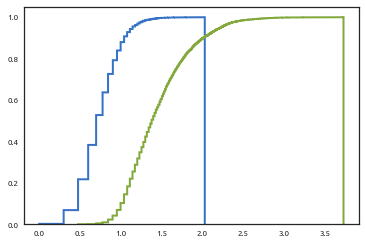

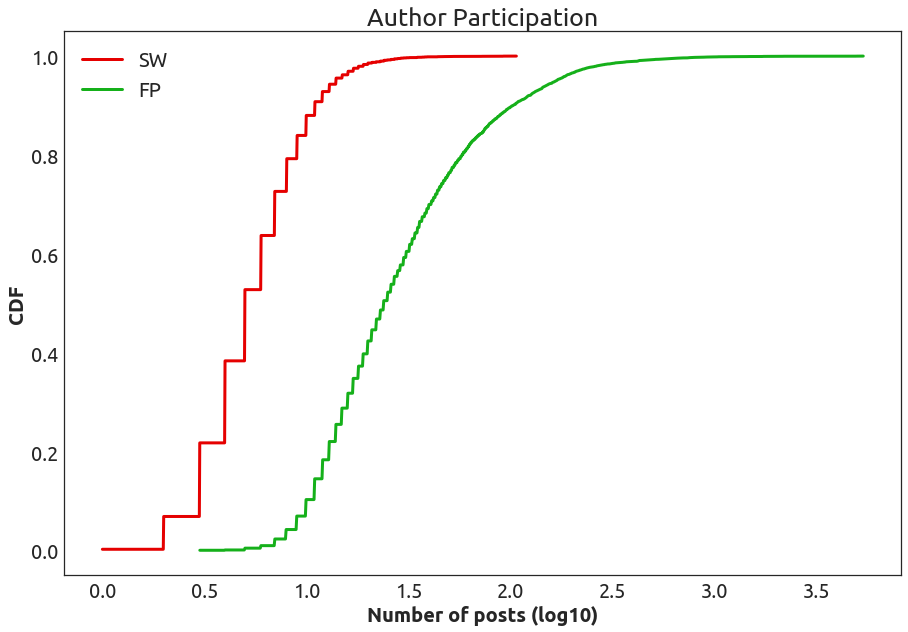

In [53]:
n1 , bins1 , patches1 = plt.hist(np.log10(authors_SW), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(np.log10(authors_BL), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
# n3 , bins3 , patches3 = plt.hist(np.log10(authors_Dep), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ax.plot(bins1[:-1], n1,mcd.XKCD_COLORS['xkcd:red'] , linewidth=3)
ax.plot(bins2[:-1], n2, mcd.XKCD_COLORS['xkcd:green'], linewidth=3)
# ax.plot(bins3[:-1], n3, 'r', linewidth=2)

plt.title("Author Participation", fontsize = 25)
plt.xlabel("Number of posts (log10)",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['SW' , 'FP' , 'r/Depression'], loc='upper left' , fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.grid()
plt.show()

In [54]:
sortedAuths_SW = sorted(authCount_SW.items(), key=operator.itemgetter(1))

top1percent_SW = sortedAuths_SW[-(int(0.01*len(sortedAuths_SW))):-1]

top1percent_SW_auths = [k[0] for k in top1percent_SW]

print len(top1percent_SW_auths) , len(SW_mods)
print float(len(list(set(top1percent_SW_auths).intersection(set(SW_mods)))))/float(len(top1percent_SW))

113 12
0.0


In [55]:
top1percent_SW[-2]

('299vs3',
 {u'11mbro11': 1,
  u'4thinversion': 1,
  u'AbigailNormal': 1,
  u'Ash_Williams109': 1,
  u'Avelaide': 1,
  u'BanjoFatterson': 1,
  u'BlueBurbon': 1,
  u'BuffaloBuckbeak': 1,
  u'BuyMeLotsOfDiamonds': 1,
  u'CGKarkat': 1,
  u'CarolineJohnson': 1,
  u'CelestialRose': 1,
  u'ColbyJacklin': 1,
  u'CreativeHooker': 1,
  u'Cuddlesaurusrex': 1,
  u'DeLaNope': 1,
  u'Erainor': 1,
  u'EvilLittleCar': 1,
  u'Five_Bite': 1,
  u'Hegulator': 1,
  u'HereFattyFatty': 1,
  u'High0nLife': 1,
  u'Inconspicuously_here': 1,
  u'Isolation_': 1,
  u'Jhaturtle': 1,
  u'La_Fee_Verte': 1,
  u'Link_to_Zelda': 1,
  u'Meihem76': 1,
  u'Memyselfsomeotherguy': 1,
  u'Miss_anthropyy': 1,
  u'NoDakGirl': 1,
  u'Noisy_Toy': 1,
  u'PaprikaGirl': 1,
  u'Pizz_': 1,
  u'Plaguerat18': 1,
  u'Retromancer': 1,
  u'RosyPancakes': 1,
  u'SayceGards': 1,
  u'SebastionMaugris': 1,
  u'Shezzam': 1,
  u'ShiJing': 1,
  u'Shubzeh': 1,
  u'Sirocca': 1,
  u'SkeletalArcher': 1,
  u'TheDugtrio': 1,
  u'TheKnightWhoSaysEEN': 

In [56]:
sortedAuths_BL = sorted(authCount_BL.items(), key=operator.itemgetter(1))

top1percent_BL = sortedAuths_BL[-(int(0.01*len(sortedAuths_BL))):-1]

top1percent_BL_auths = [k[0] for k in top1percent_BL]

print len(top1percent_BL_auths) , len(AS_mods)
# print float(len(list(set(top1percent_BL_auths).intersection(set(AS_mods)))))/float(len(top1percent_BL))

113 2


In [57]:
top1percent_BL[-2]

(u'7yxgfz',
 {u'devicer2': 1,
  u'Cobaltjedi117': 1,
  u'sonicyouthed': 1,
  u'Malkiot': 1,
  u'agbullet': 1,
  u'Inevpatoria': 1,
  u'thisisdada': 1,
  u'snugglepea': 1,
  u'1dayHappy_1daySad': 1,
  u'HeilHilter': 1,
  u'LJ161': 1,
  u'SuckMyYaris': 1,
  u'1DarkShadowBlade': 1,
  u'Team_Braniel': 1,
  u'Takumi-Fujiwara': 1,
  u'WodtheHunter': 1,
  u'serialz1': 1,
  u'A_Silly_Pickle': 1,
  u'BrQQQ': 1,
  u'empathetical': 1,
  u'FeelDeAssTyson': 1,
  u'Piedninny17': 1,
  u'WheretheLightDies': 1,
  u'Ghost_Knife': 1,
  u'NK1337': 1,
  u'TheNumberMuncher': 1,
  u'whomad1215': 1,
  u'Physicsbitch': 1,
  u'Bnjamin10': 1,
  u'TEH_PROOFREADA': 1,
  u'Larusso92': 1,
  u'aBigBottleOfWater': 1,
  u'oss_spy': 1,
  u'Thraheg': 1,
  u'Khanstipated': 1,
  u'sCifiRacerZ': 1,
  u'justiceguy216': 1,
  u'111122223138': 1,
  u'Dedod_2': 1,
  u'Drackir': 1,
  u'blueterminal': 1,
  u'caryb': 1,
  u'jayred1015': 1,
  u'cool_weed_dad': 1,
  u'M0n5tr0': 1,
  u'Fellhuhn': 1,
  u'KJBenson': 1,
  u'smaghammer': 

In [58]:
sampled_BL[sampled_BL.keys()[19]].nodes(data=True)

[(u't1_dv2sitr',
  {'affects': 0.0,
   'author': u'Shiny_arr0wz',
   'depth': 0,
   'downs': 0,
   'text': 'l00000000l',
   'time': 1520008555.0,
   'ups': 2}),
 (u't1_dv302d0',
  {'affects': -100.0,
   'author': u'Someone9339',
   'depth': 0,
   'downs': 0,
   'text': ' #stealhislook',
   'time': 1520015525.0,
   'ups': 4}),
 (u't1_dv2zrk8',
  {'affects': -8.33,
   'author': u'Hsky12',
   'depth': 2,
   'downs': 0,
   'text': 'Yeah I was worried there for a second. 750kcal drink is insane ',
   'time': 1520015248.0,
   'ups': 3}),
 (u't1_dv3d2rn',
  {'affects': 20.0,
   'author': u'Drox01',
   'depth': 3,
   'downs': 0,
   'text': '&gt; s Yeah oh well',
   'time': 1520028018.0,
   'ups': 1}),
 (u't1_dv3epb4',
  {'affects': 0.0,
   'author': u'Tuss1n',
   'depth': 2,
   'downs': 0,
   'text': 'Is said BLACK. Not black ',
   'time': 1520029739.0,
   'ups': -3}),
 (u't1_dv3jhpi',
  {'affects': 16.67,
   'author': u'Fercopp',
   'depth': 4,
   'downs': 0,
   'text': 'Oh well in my country

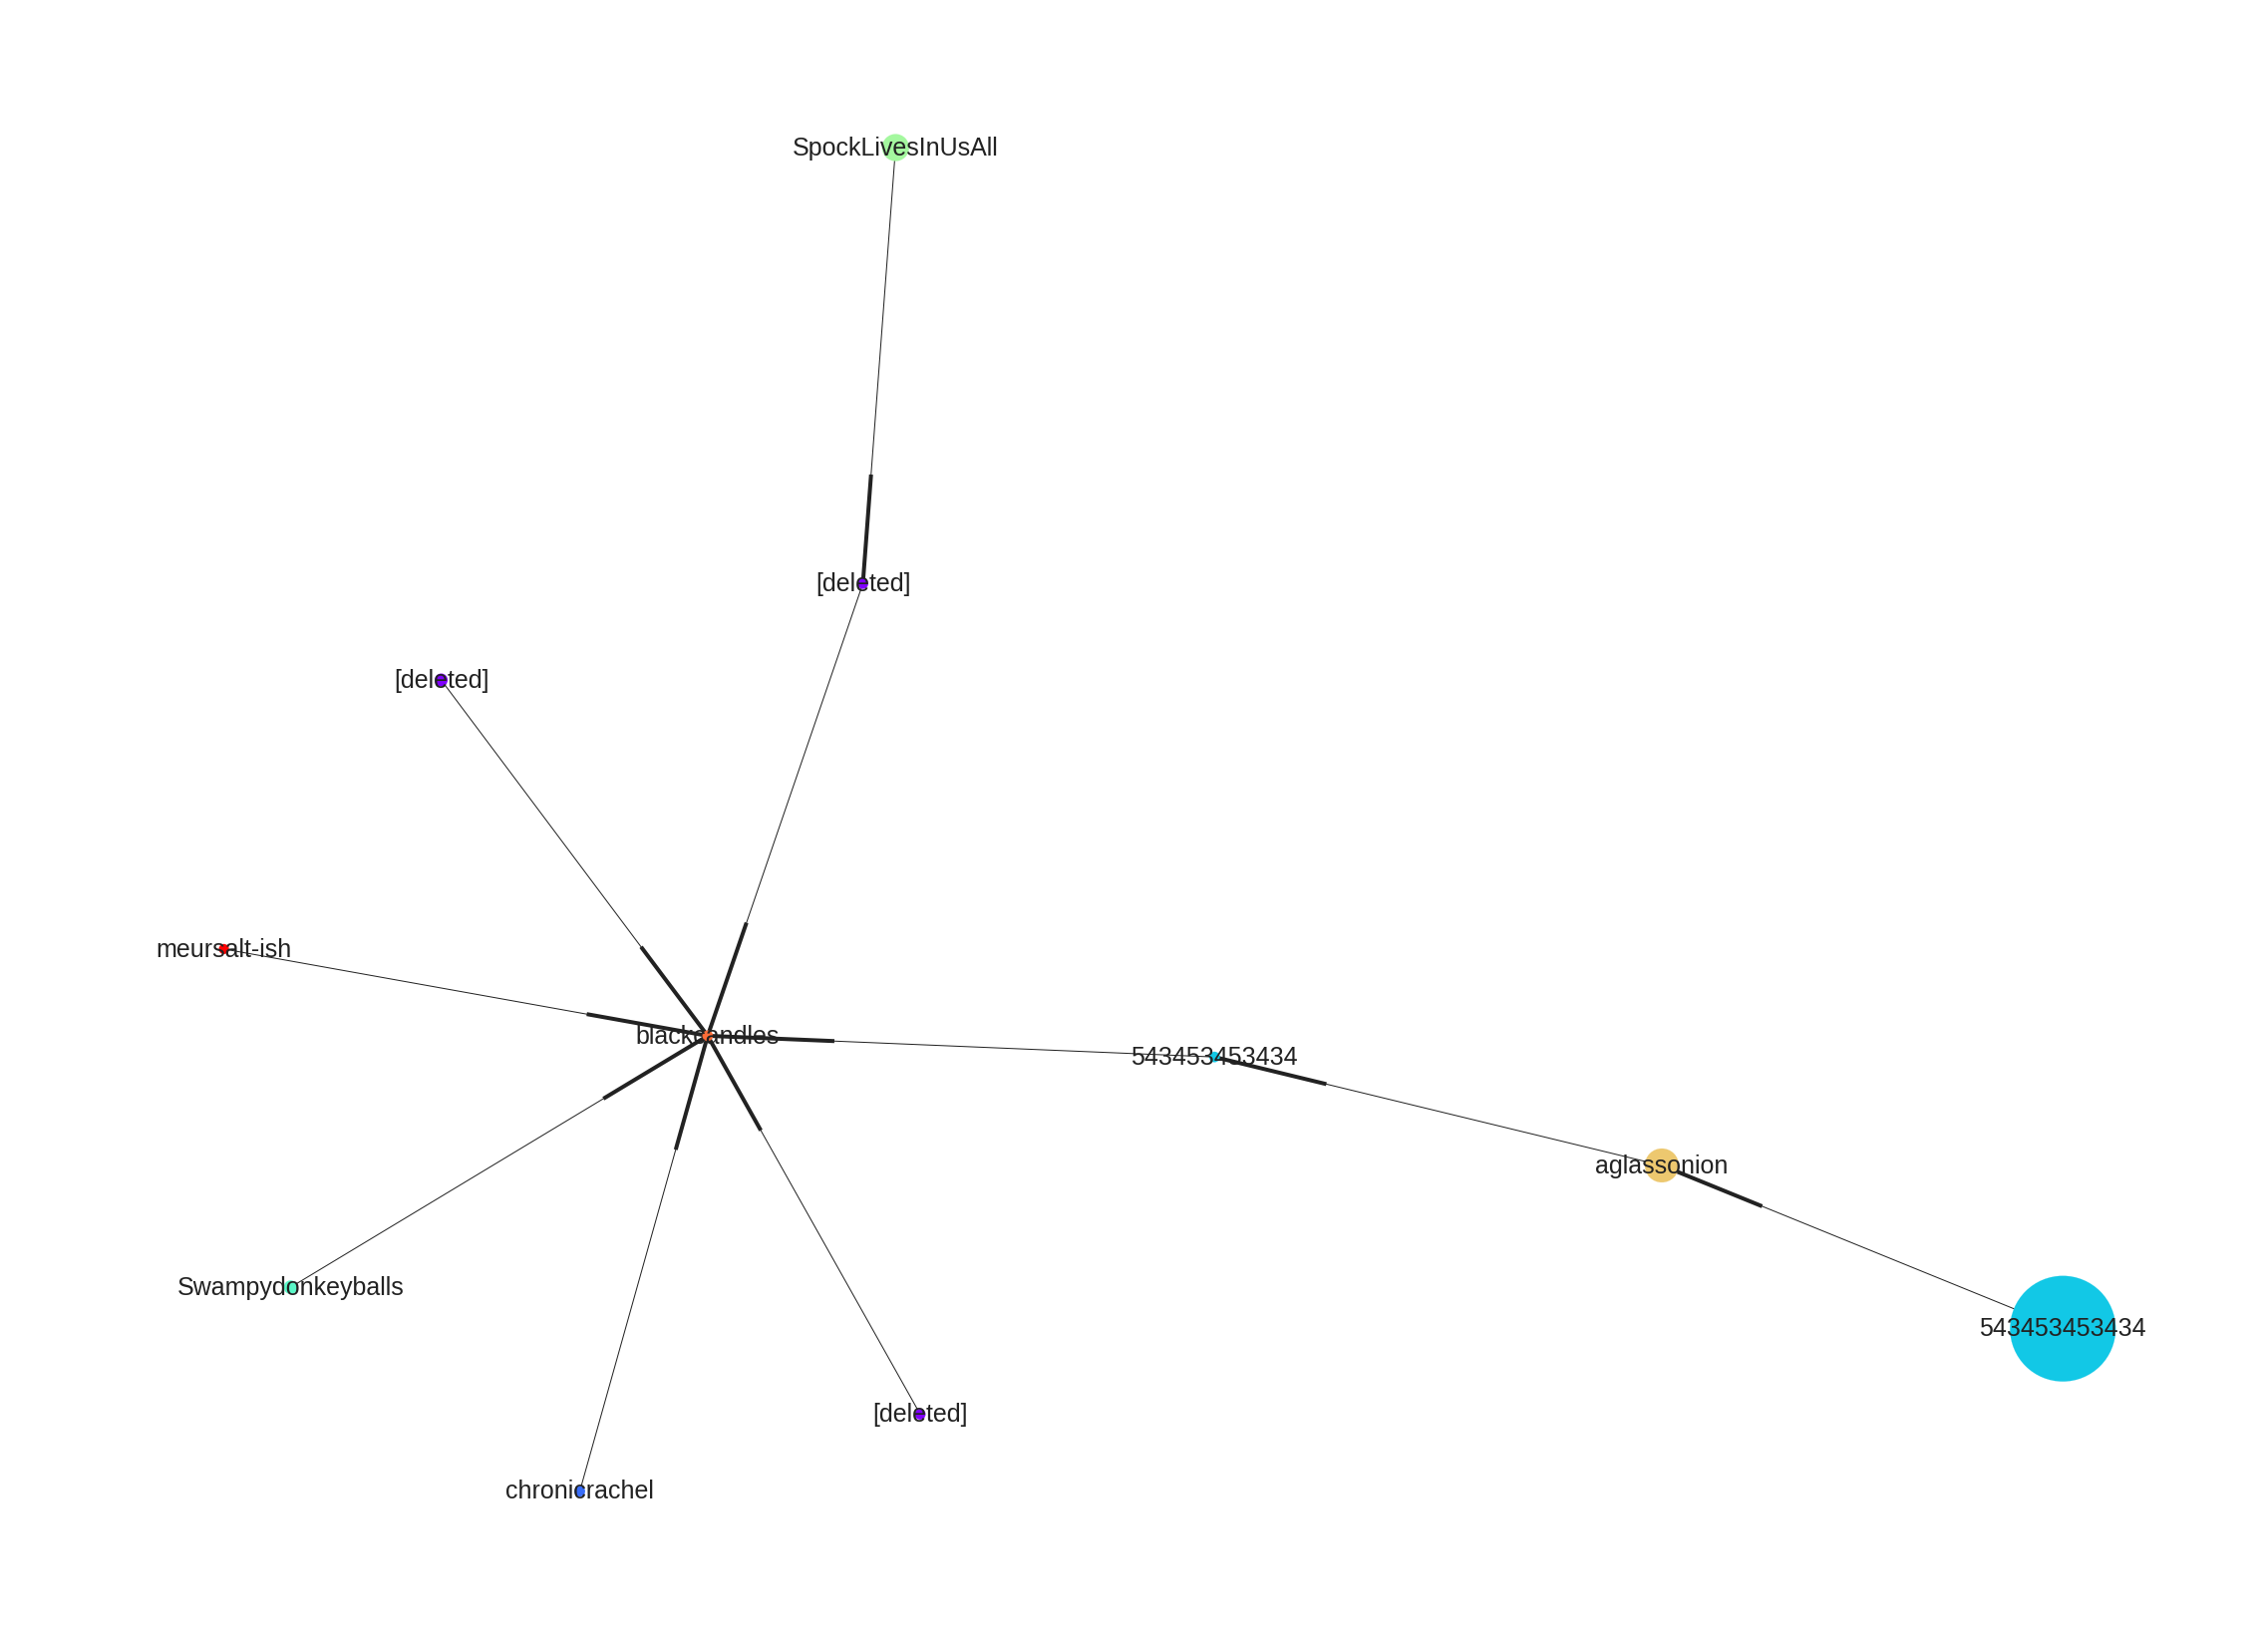

In [59]:
drawReplyGraph(sampled_SW[sampled_SW.keys()[151]])

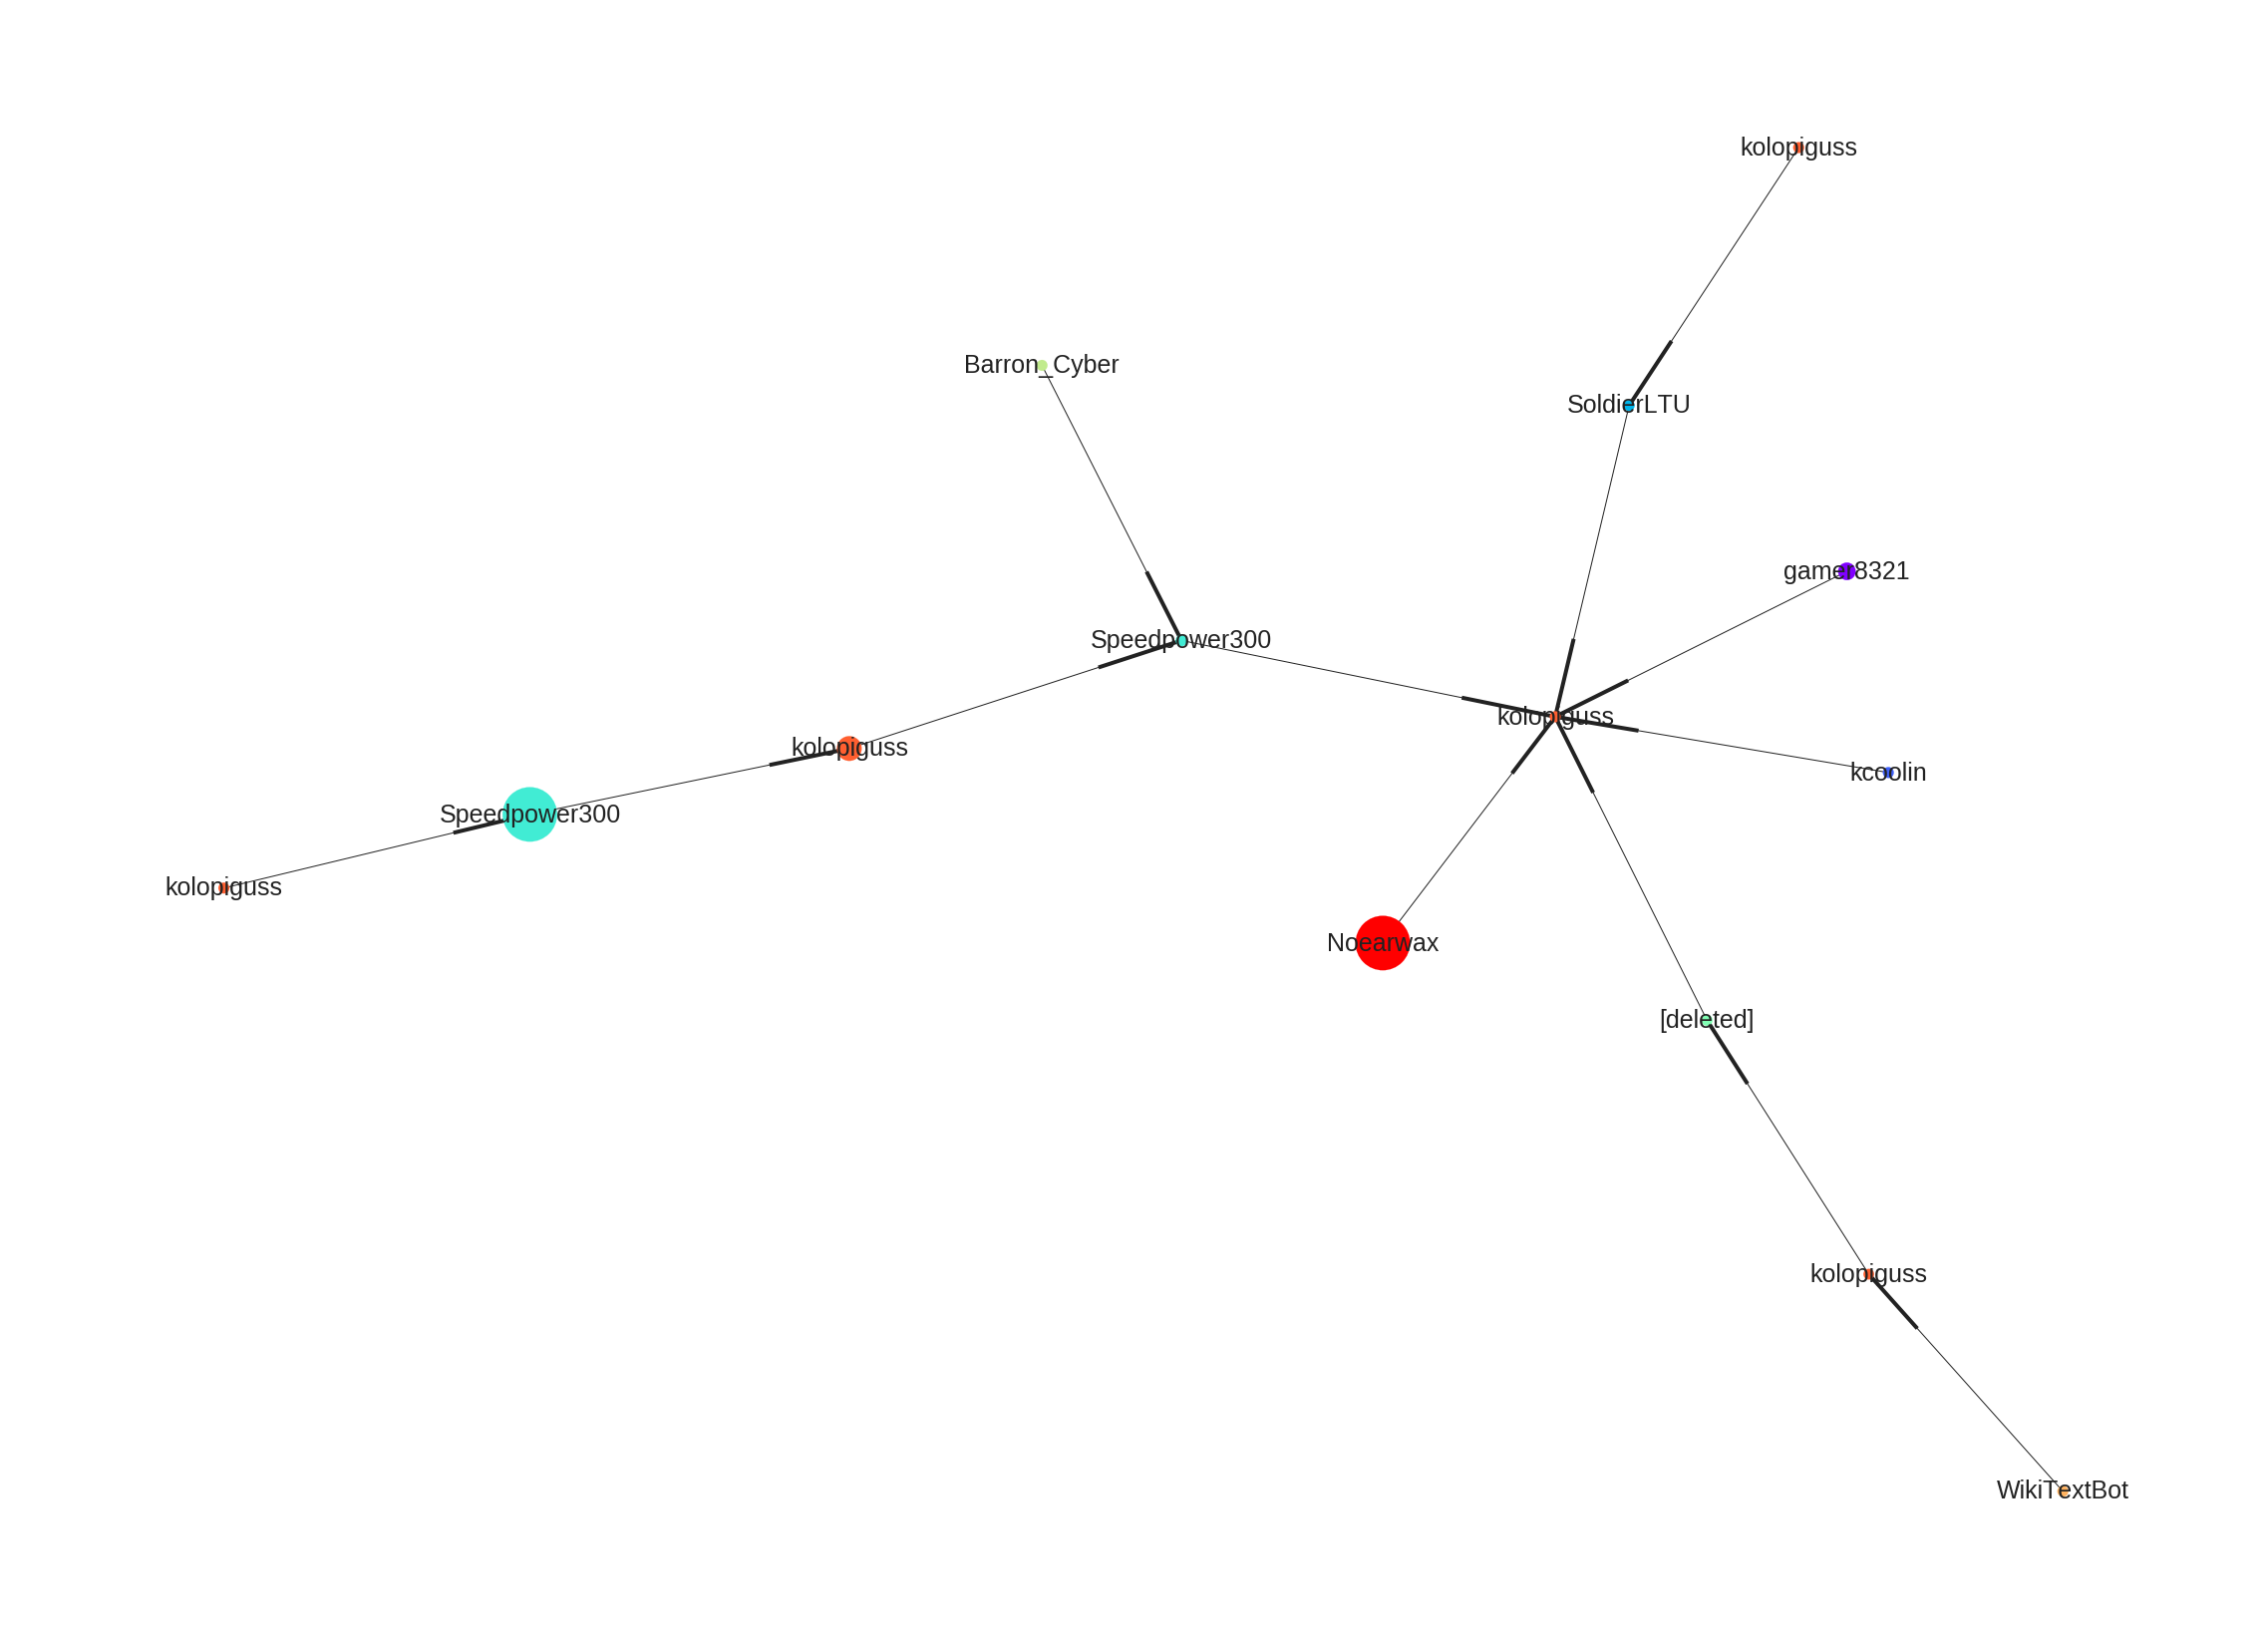

In [60]:
drawReplyGraph(sampled_BL[sampled_BL.keys()[151]])

In [61]:
userGraphs_SW = createUserGraphs(sampled_SW)

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

In [62]:
userGraphs_BL = createUserGraphs(sampled_BL)

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

In [63]:
userGraphs_Dep = createUserGraphs(sampled_Dep)

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a later message
Found a la

In [64]:
userGraphs_Dep[userGraphs_Dep.keys()[10]].edges(data=True)

[(u'[deleted]', u'[deleted]', {'timestamp': 1486605028.0, 'weight': 24}),
 (u'[deleted]', u'Rajah912', {'timestamp': 1486576158.0, 'weight': 1}),
 (u'[deleted]', u'PureSmoulder', {'timestamp': 1486584131.0, 'weight': 1}),
 (u'[deleted]', u'highwebl', {'timestamp': 1486568702.0, 'weight': 1}),
 (u'[deleted]', u'BillyBatts99', {'timestamp': 1486587193.0, 'weight': 1}),
 (u'[deleted]', u'acatshapedpool', {'timestamp': 1486575822.0, 'weight': 2}),
 (u'[deleted]', u'fbgm_katie', {'timestamp': 1486580484.0, 'weight': 1}),
 (u'[deleted]', u'FacebookRefugee', {'timestamp': 1486589425.0, 'weight': 1}),
 (u'beernsleep', u'[deleted]', {'timestamp': 1486586441.0, 'weight': 1}),
 (u'Moosedog666', u'[deleted]', {'timestamp': 1486552161.0, 'weight': 1}),
 (u'awesome_lamer', u'[deleted]', {'timestamp': 1486576769.0, 'weight': 1}),
 (u'acatshapedpool', u'[deleted]', {'timestamp': 1486652136.0, 'weight': 2}),
 (u'cg_Sprite', u'[deleted]', {'timestamp': 1486647339.0, 'weight': 1}),
 (u'321taylor', u'[del

In [65]:
len(userGraphs_BL), len(userGraphs_SW), len(userGraphs_Dep)

(11437, 11437, 1298)

In [66]:
#userGraphs_BL[sampled_BL.keys()[19]].edges(data=True)

In [67]:
# drawUserGraph(userGraphs_BL[sampled_BL.keys()[19]])

In [68]:
def getSortedSizeDict(graphs):
    size = dict()
    for k in graphs:
        size[k] = len(graphs[k].nodes())
    sortedSizes = sorted(size.items(),key=operator.itemgetter(1))
    return sortedSizes

def getSampledResponses(replyGraphs , keys):
    responses = {}
    for k in keys:
        responses[k] = {}
        responses[k]['-1'] = tuple()
        responses[k]['0']  = []
        for n in replyGraphs[k].nodes(data=True):
            if n[1]['depth'] == -1:
                responses[k]['-1'] = n
            if n[1]['depth'] == 0:
                if n[1]['text'] != '[removed]':
                    if len(n[1]['text']) > 20:
                        responses[k]['0'].append(n)
    return responses
            
            
        

In [69]:
sortedReplyGraphs = getSortedSizeDict(sampled_SW)

In [70]:
sorted_responses= getSampledResponses(sampled_SW,[k[0] for k in sortedReplyGraphs[7000:7020]])

In [71]:
# fieldnames = ['postId', 'postDepth','author','text']
# with open("RinaSampleV2.csv", 'wb') as output_file:
#     dict_writer = csv.DictWriter(output_file, fieldnames=fieldnames)
#     dict_writer.writeheader()
#     for k in sorted_responses:
#         root_resp = sorted_responses[k]['-1'][1]
#         dict_writer.writerow({'postId': k , 'postDepth': 'root' , 'author': root_resp['author'] , 'text' : root_resp['text']})
#         for r in sorted_responses[k]['0']:
#             dict_writer.writerow({'postId': k , 'postDepth': 'first_response' , 'author': r[1]['author'] , 'text' : r[1]['text']})


In [72]:
# g = (allGraphs_SW[sortedReplyGraphs[-1][0]])
# for n in g.nodes(data=True):
#      if n[1]['depth'] == 0:
#          print n

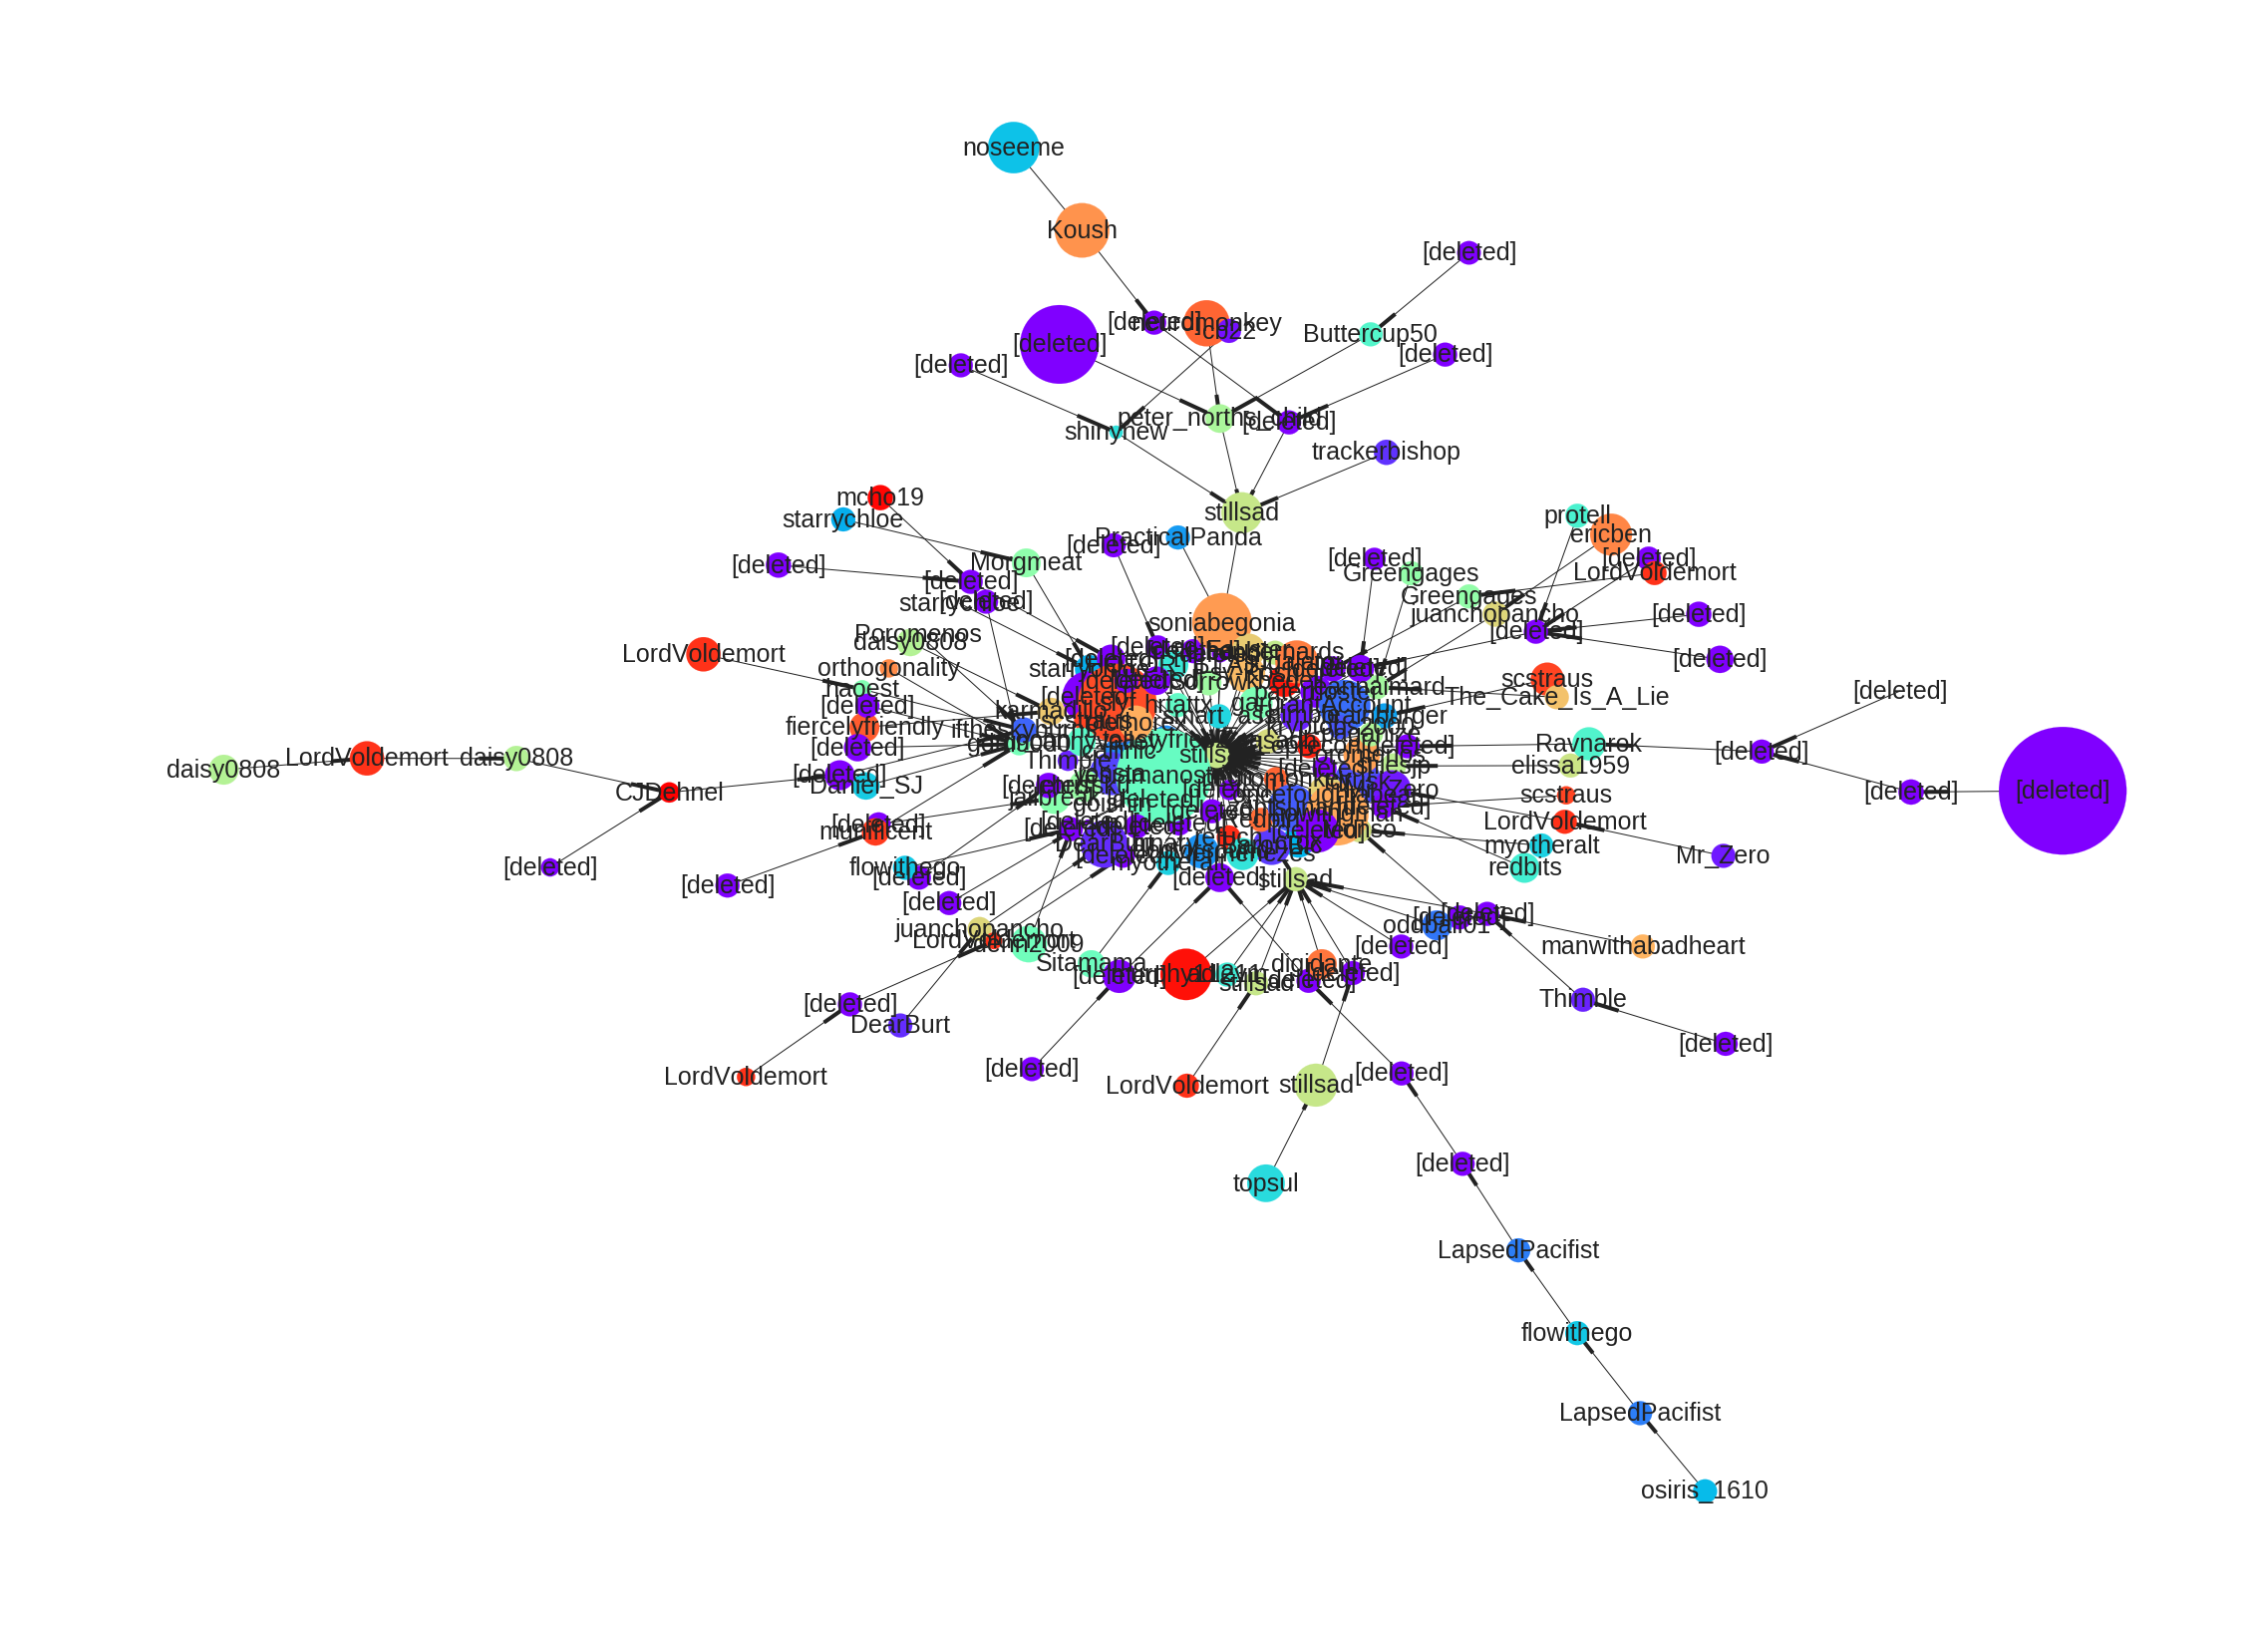

In [73]:
drawReplyGraph(sampled_SW[sortedReplyGraphs[-10][0]])

92


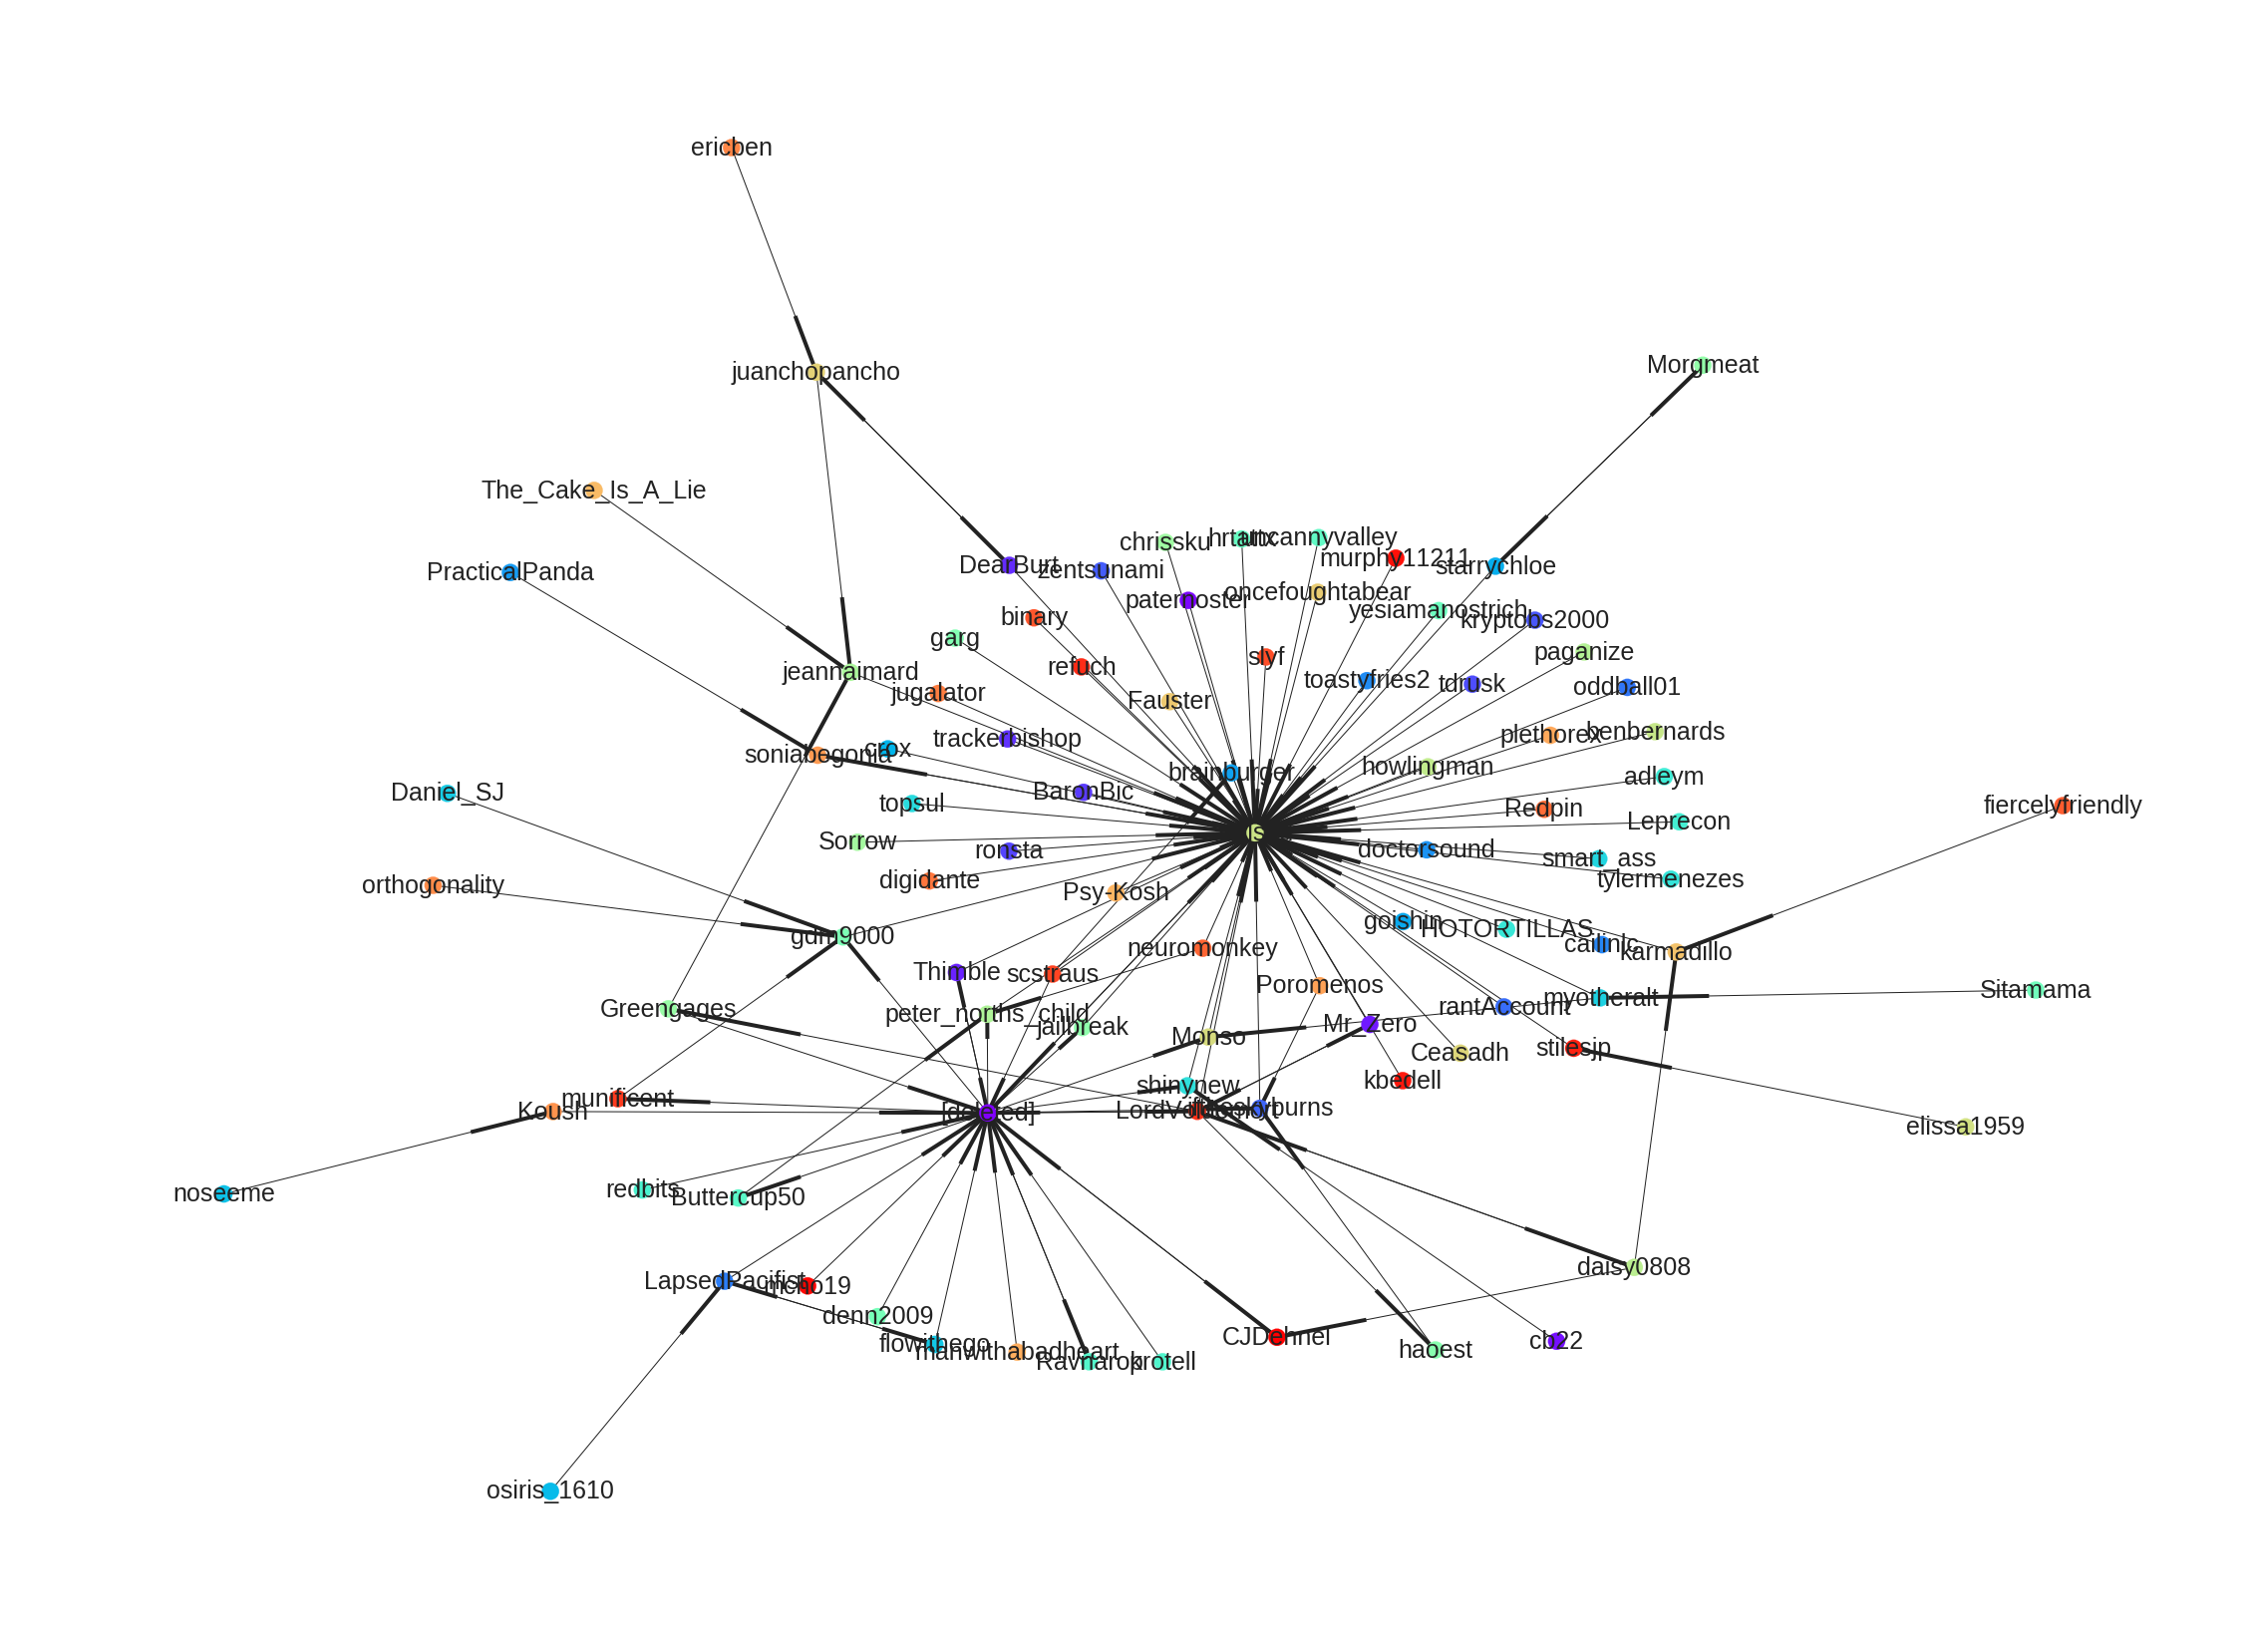

In [74]:
drawUserGraph(userGraphs_SW[sortedReplyGraphs[-10][0]])

In [75]:
# Save sampled Reply Graphs: 
# with open("../Data/SW_ReplyGraph_sampled_V3.pkl",'wb') as f:
#     pkl.dump(file=f , obj=sampled_SW)

In [76]:
# with open("../Data/BL_ReplyGraph_sampled_V3.pkl",'wb') as f:
#     pkl.dump(file=f , obj=allGraphs_SW)

In [77]:
#Save sampled USer Graphs: 
# with open("../Data/FrontPage/SW_ugraph_sampled_V3.pkl",'wb') as f:
#     pkl.dump(file=f , obj=userGraphs_SW)

In [78]:
#Save sampled USer Graphs: 
# with open("../Data/FrontPage/FP_ugraph_sampled_V3.pkl",'wb') as f:
#     pkl.dump(file=f , obj=userGraphs_BL)

113


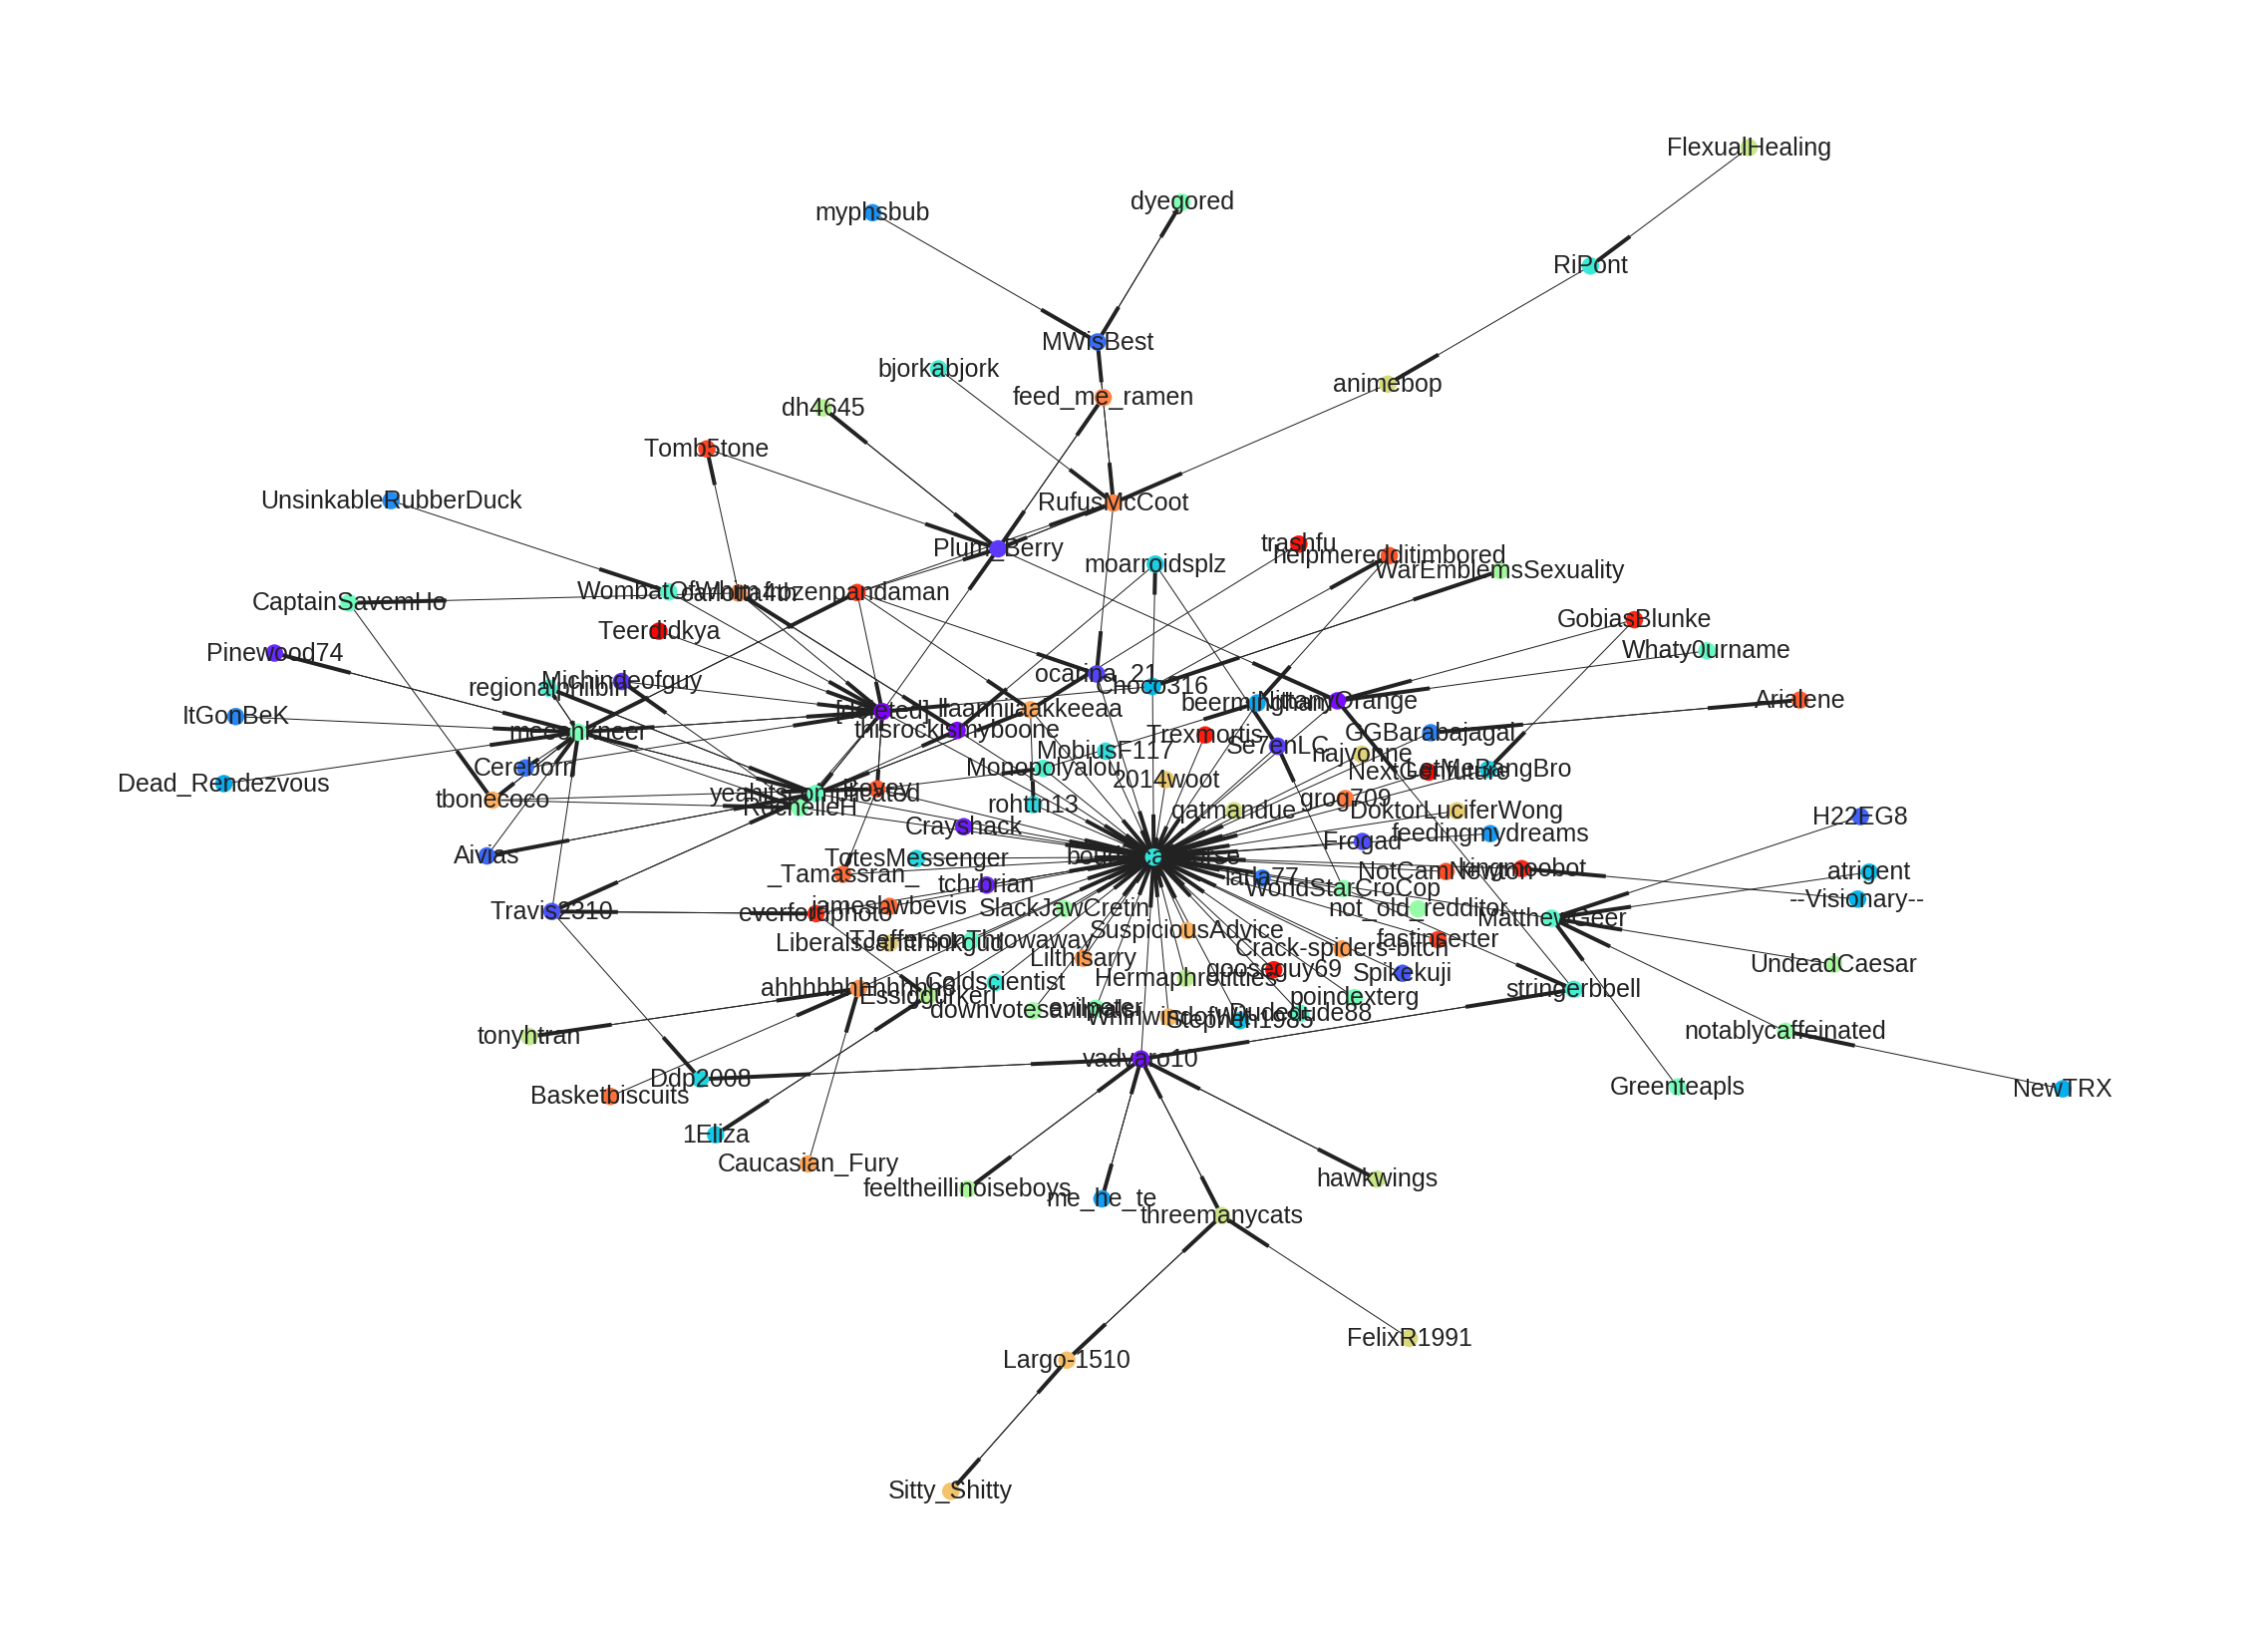

In [79]:
drawUserGraph(userGraphs_BL[sampled_BL.keys()[16]])

In [80]:
def getRootauthors(replyGraphs):
    rootAuthors = {}
    for k in replyGraphs:
        g = replyGraphs[k]
        for node in g:
            if 'depth' in g.node[node]:
                if g.node[node]['depth'] == -1:
                    rootAuthors[k] =  g.node[node]['author']
    return rootAuthors

def filterDeletedOPGraphs(userGraphs,opAuthors):
    print len(opAuthors) , len(userGraphs)
    filteredUserGraphs = {}
    for g in userGraphs:
        if opAuthors[g] != '[deleted]':
            filteredUserGraphs[g] = userGraphs[g]
    return filteredUserGraphs

In [81]:
opAuthors_SW = getRootauthors(sampled_SW)
opAuthors_BL = getRootauthors(sampled_BL)
opAuthors_Dep = getRootauthors(sampled_Dep)

In [82]:
len(opAuthors_SW) , len(opAuthors_BL), len(opAuthors_Dep)

(11437, 11437, 1298)

In [83]:
with open("BL_opAuthors_sampled_01.pkl",'w') as f:
    pkl.dump(file=f,obj=opAuthors_BL)

In [84]:
with open("SW_opAuthors_sampled_01.pkl",'w') as f:
    pkl.dump(file=f,obj=opAuthors_SW)

In [85]:
with open("Dep_opAuthors_sampled_01.pkl",'w') as f:
    pkl.dump(file=f,obj=opAuthors_Dep)

In [86]:
filteredUGraphs_SW = filterDeletedOPGraphs(userGraphs_SW,opAuthors_SW)
filteredUGraphs_BL = filterDeletedOPGraphs(userGraphs_BL,opAuthors_BL)
filteredUGraphs_Dep = filterDeletedOPGraphs(userGraphs_Dep,opAuthors_Dep)

11437 11437
11437 11437
1298 1298


In [87]:
print len(filteredUGraphs_BL) , len (filteredUGraphs_SW) , len (filteredUGraphs_Dep)

11070 10527 846


In [88]:
%store filteredUGraphs_BL

Stored 'filteredUGraphs_BL' (dict)


In [89]:
%store filteredUGraphs_SW

Stored 'filteredUGraphs_SW' (dict)


In [90]:
%store filteredUGraphs_Dep

Stored 'filteredUGraphs_Dep' (dict)


In [91]:
filteredReply_SW = {}
for k in filteredUGraphs_SW:
    filteredReply_SW[k] = sampled_SW[k]
    
filteredReply_BL = {}
for k in filteredUGraphs_BL:
    filteredReply_BL[k] = sampled_BL[k]
    
filteredReply_Dep = {}
for k in filteredUGraphs_Dep:
    filteredReply_Dep[k] = sampled_Dep[k]

In [92]:
len(filteredReply_SW) , len(filteredReply_BL), len(filteredReply_Dep)

(10527, 11070, 846)

In [93]:
#Save sampled USer Graphs: 
# with open("../Data/SW_Sampled_ugraph_V3.pkl",'wb') as f:
#     pkl.dump(file=f , obj=filteredUGraphs_SW)
    

# with open("../Data/BL_Sampled_ugraph_V3.pkl",'wb') as f:
#     pkl.dump(file=f , obj=filteredUGraphs_BL)

In [94]:
# with(open("SW_OpAuthors_3.pkl",'wb')) as f:
#     pkl.dump(opAuthors_SW,f)

# with(open("BL_OpAuthors_3.pkl",'wb')) as f:
#     pkl.dump(opAuthors_BL,f)

In [95]:
def getDegreeDist(graphs):
    degrees = []
    for g in graphs:
        dist = nx.degree(graphs[g]).values()
        degrees = degrees + [k+1 for k in dist]
    return degrees

def getDepths(replygraphs):
    depths = []
    for g in replygraphs:
        depth = nx.get_node_attributes(replygraphs[g],'depth')
        depths = depths + [depth[k]+1  for k in depth if depth[k] >= 0 ]
    return depths
        

In [96]:
sns.set_style("whitegrid")

Text(0.5,1,'Depth of conversation')

Text(0.5,0,'Depth in replies (log 10)')

Text(0,0.5,'CDF')

(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5]),
 <a list of 7 Text xticklabel objects>)

(array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1]),
 <a list of 10 Text yticklabel objects>)

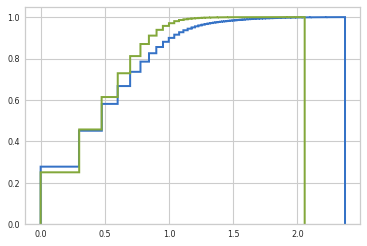

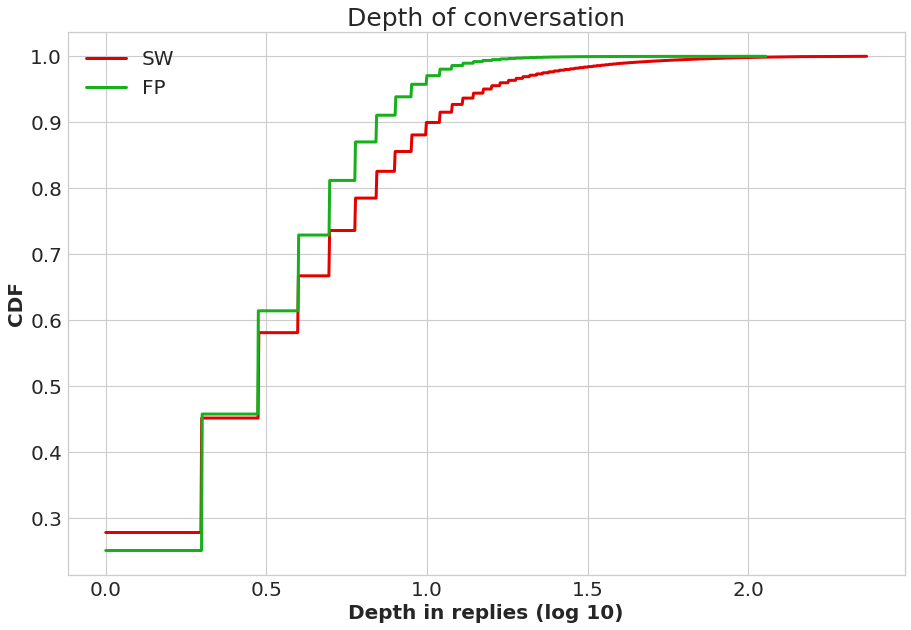

In [97]:
n1 , bins1 , patches1 = plt.hist(np.log10(getDepths(filteredReply_SW)), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(np.log10(getDepths(filteredReply_BL)), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
# n3 , bins3 , patches3 = plt.hist(np.log10(getDepths(filteredReply_Dep)), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)


fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

ax.plot(bins1[:-1], n1, mcd.XKCD_COLORS['xkcd:red'], linewidth=3)
ax.plot(bins2[:-1], n2,mcd.XKCD_COLORS['xkcd:green'], linewidth=3)
# ax.plot(bins3[:-1], n3, 'r', linewidth=2)
plt.title("Depth of conversation", fontsize = 25)
plt.xlabel("Depth in replies (log 10)",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['SW','FP', 'r/Depression'], loc='upper left' , fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.grid()
plt.show()

In [98]:
depth_SW = getDepths(filteredReply_SW)
depth_BL = getDepths(filteredReply_BL)
depth_Dep = getDepths(filteredReply_Dep)

print np.mean(depth_SW) , np.median(depth_SW)
print np.mean(depth_BL) , np.median(depth_BL)
print np.mean(depth_Dep) , np.median(depth_Dep)

5.254358103298462 3.0
3.584529274184808 3.0
2.4709915828371996 2.0


In [99]:
from scipy.stats import mannwhitneyu
def findMannWhitney(vec1 , vec2):
    if len(vec1) > len(vec2):
        vec1 = random.sample(vec1 , len(vec2))
    elif len(vec2) > len(vec1): 
        vec2 = random.sample(vec2 , len(vec1))
    else:
        print "Samples are same size, no need to resample"
    statistic , pvalue = mannwhitneyu(vec1, vec2)
    return statistic, pvalue
        

In [100]:
print len(getDegreeDist(filteredReply_BL) ), len(getDegreeDist(filteredReply_SW))

stats , pvalue = findMannWhitney(getDegreeDist(filteredReply_SW) , getDegreeDist(filteredReply_BL))
normstats , normpvalue = findMannWhitney(getDegreeDist(filteredReply_SW) , getDegreeDist(filteredReply_SW))
print stats/normstats, pvalue

869181 214229
Samples are same size, no need to resample
0.8499156663307741 0.0


Text(0.5,1,'Degree distribution in Reply graphs')

Text(0.5,0,'Degree (log10)')

Text(0,0.5,'CDF')

(array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ]),
 <a list of 11 Text xticklabel objects>)

(array([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1]),
 <a list of 9 Text yticklabel objects>)

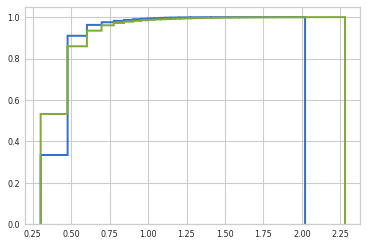

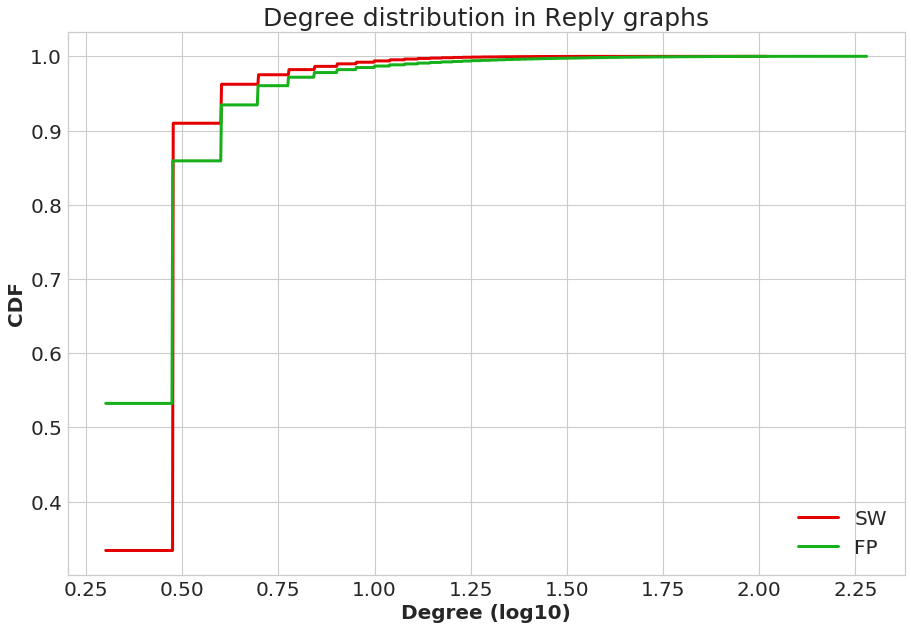

In [101]:
n1 , bins1 , patches1 = plt.hist(np.log10(getDegreeDist(filteredReply_SW)), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(np.log10(getDegreeDist(filteredReply_BL)), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
# n3 , bins3 , patches3 = plt.hist(np.log10(getDegreeDist(filteredReply_Dep)), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)

fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ax.plot(bins1[:-1], n1, mcd.XKCD_COLORS['xkcd:red'], linewidth=3)
ax.plot(bins2[:-1], n2, mcd.XKCD_COLORS['xkcd:green'], linewidth=3)
# ax.plot(bins3[:-1], n3, 'r', linewidth=2)

plt.title("Degree distribution in Reply graphs", fontsize = 25)
plt.xlabel("Degree (log10)",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['SW','FP','r/Depression'], loc='lower right' , fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.grid()
plt.show()

Text(0.5,1,'Degree distribution in User graphs')

Text(0.5,0,'Degree (log10)')

Text(0,0.5,'CDF')

(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. ]),
 <a list of 7 Text xticklabel objects>)

(array([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1]),
 <a list of 9 Text yticklabel objects>)

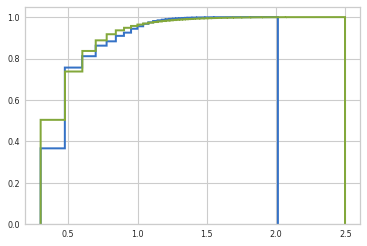

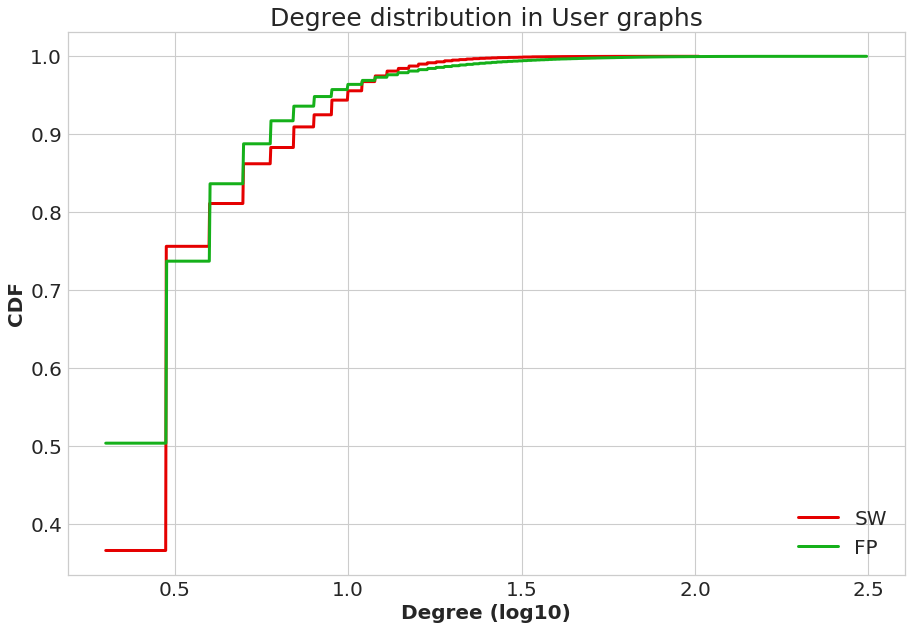

In [102]:
n1 , bins1 , patches1 = plt.hist(np.log10(getDegreeDist(filteredUGraphs_SW)), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(np.log10(getDegreeDist(filteredUGraphs_BL)), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
# n3 , bins3 , patches3 = plt.hist(np.log10(getDegreeDist(filteredUGraphs_Dep)), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)


fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

ax.plot(bins1[:-1], n1, mcd.XKCD_COLORS['xkcd:red'], linewidth=3)
ax.plot(bins2[:-1], n2, mcd.XKCD_COLORS['xkcd:green'], linewidth=3)
# ax.plot(bins3[:-1], n3, 'r', linewidth=2)

plt.title("Degree distribution in User graphs", fontsize = 25)
plt.xlabel("Degree (log10)",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['SW','FP','r/Depression'], loc='lower right' , fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.grid()
plt.show()

In [103]:
print len(getDegreeDist(filteredUGraphs_SW) ), len(getDegreeDist(filteredUGraphs_BL))

stats , pvalue = findMannWhitney(getDegreeDist(filteredUGraphs_SW) , getDegreeDist(filteredReply_BL))
print stats , pvalue
normstats , normpvalue = findMannWhitney(getDegreeDist(filteredUGraphs_SW) , getDegreeDist(filteredUGraphs_SW))
print stats/normstats, pvalue

68961 557200
1897388087.5 0.0
Samples are same size, no need to resample
0.7979562196350906 0.0


In [104]:


def getSymmetricBehaviour(filteredUserGraphs,opAuthors):
    messageParti = []
    userParti = []
    BPusers = {}
    for k in filteredUserGraphs:
        g = filteredUserGraphs[k]
        BPuser = 0
        BPmsges = 0

        BPusers[k] = []
        for (u,v) in g.edges():
            if u != v :          
                toMsgs = 0
                fromEdges = 0
                if v == opAuthors[k]:
                    if u in g[v]:
                        BPuser +=1
#                         print k , v , u
                        BPusers[k].append(u)
                        toMsgs = g.get_edge_data(u,v)['weight']
                        fromEdges = g.get_edge_data(v,u)['weight']
                        BPmsges= BPmsges + min(2*toMsgs,fromEdges)
        if len(g.nodes()) == 0:
#             print g.edges()
            continue
        userParti.append(float(BPuser)/float(len(g.nodes())))
        edgeWeights = sum([edge[2]['weight'] for edge in g.edges(data=True)])
        messageParti.append(float(BPmsges)/float(edgeWeights))
    return messageParti , userParti, BPusers

def getSymmetricOPResponses(replyGraphs , opAuthors):
    conversationChains = {}
    
    for k in replyGraphs:
        g = replyGraphs[k]
        authors = nx.get_node_attributes(g,'author')
        edges = g.edges()
        conversationChains[k] = {}
        conversationChains[k]['op'] = []
        conversationChains[k]['bp'] = []
        if opAuthors[k] == '[deleted]':
            continue
        for e in nx.dfs_edges(g):
            if k not in opAuthors:
                print "OP index not found"
                continue
            if e[1] not in authors or e[0] not in authors:
                print "Edge authors not found"
                continue
            if authors[e[1]] == opAuthors[k]:
                if g.node[e[1]]['text'] == '[deleted]':
                    continue
                conversationChains[k]['op'].append(g.node[e[1]])
                conversationChains[k]['bp'].append(g.node[e[0]])
    return conversationChains
                

def getTimeDistribution(replyGraphs,opAuthors):
    timeDist = []
    for k in replyGraphs:
        g = replyGraphs[k]
        times = nx.get_node_attributes(g,'time')
        authors = nx.get_node_attributes(g,'author')
        for e in g.edges():
            if k not in opAuthors:
                print "Not the correct oplist "
                continue
            if e[1] not in authors:
                print "Author not found"
                continue
            if authors[e[1]] == opAuthors[k]:
                if e[0] in times:
                    timeDiff = times[e[0]] - times[e[1]]
                    if timeDiff == 0 or timeDiff < 0:
                        timeDiff = 1
                    timeDist.append(float(timeDiff)/60.0)
    return timeDist


def getAllTimeDifferences(replyGraphs):
    timeDiffs = []
    for k in replyGraphs:
        g = replyGraphs[k]
        times = nx.get_node_attributes(g,'time')
        for e in g.edges():
            if (e[0] not in times) or (e[1] not in times):
                print " Time not found"
                continue
                
            timeDiff = times[e[0]] - times[e[1]]
            if timeDiff == 0 or timeDiff < 0:
                timeDiff = 1
            timeDiffs.append(float(timeDiff)/60.0)
    return timeDiffs

def getSortedbyTimeEmotions(replyGraphs,opAuthors):
    timeDiff = []
    sentiDiff = []
    for k in replyGraphs:
        g = replyGraphs[k]
        times = nx.get_node_attributes(g,'time')
        authors = nx.get_node_attributes(g,'author')
        sentiments = nx.get_node_attributes(g,'affects')
        opSenti = {}
        opTime = {}
        for n in g.nodes():
            if n not in authors:
                print "author not found" + n
                continue
            if authors[n] == opAuthors[k]:
                opSenti[n] = sentiments[n]
                opTime[n] = times[n]
        if len(opTime)>1:
            sortedNodes = sorted(opTime.items(), key=operator.itemgetter(1))
            if sortedNodes[-1][1] < sortedNodes[0][1]:
                print "Wrong sorting continue"
                print times[sortedNodes[-1][0]] , times[sortedNodes[0][0]]
                continue
            timeDiff.append(float(sortedNodes[-1][1] - sortedNodes[0][1]))
            sentiDiff.append(opSenti[sortedNodes[-1][0]] - opSenti[sortedNodes[0][0]])
                
    return timeDiff , sentiDiff

In [105]:
# allGraphs_SW[allGraphs_SW.keys()[100]].edges()

In [106]:
# allGraphs_SW[allGraphs_SW.keys()[1]].node['t1_cb958j2']

In [107]:
convChainsSW = getSymmetricOPResponses(sampled_SW, opAuthors_SW)

Edge authors not found


In [108]:
# print convChainsSW

In [109]:
times = nx.get_node_attributes(filteredReply_SW[filteredReply_SW.keys()[1]],'time')
sortedNodes = sorted(times.items(), key=operator.itemgetter(1))
print sortedNodes[-1][1]

1390035754.0


In [110]:
len(opAuthors_SW) , len(opAuthors_BL)

(11437, 11437)

In [111]:
SW_OPTimeDiff , SW_OPSentiDiff = getSortedbyTimeEmotions(filteredReply_SW,opAuthors_SW)

author not foundt3_g5rqg


In [112]:
BL_OPTimeDiff , BL_OPSentiDiff = getSortedbyTimeEmotions(filteredReply_BL,opAuthors_BL)

In [113]:
Dep_OPTimeDiff , Dep_OPSentiDiff = getSortedbyTimeEmotions(filteredReply_Dep,opAuthors_Dep)

In [114]:
len(SW_OPSentiDiff)

9860

Text(0.5,1,'Sentiment change across first and last message by OP')

Text(0.5,0,'Change')

Text(0,0.5,'CDF')

(array([-150., -100.,  -50.,    0.,   50.,  100.,  150.,  200.,  250.]),
 <a list of 9 Text xticklabel objects>)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 <a list of 7 Text yticklabel objects>)

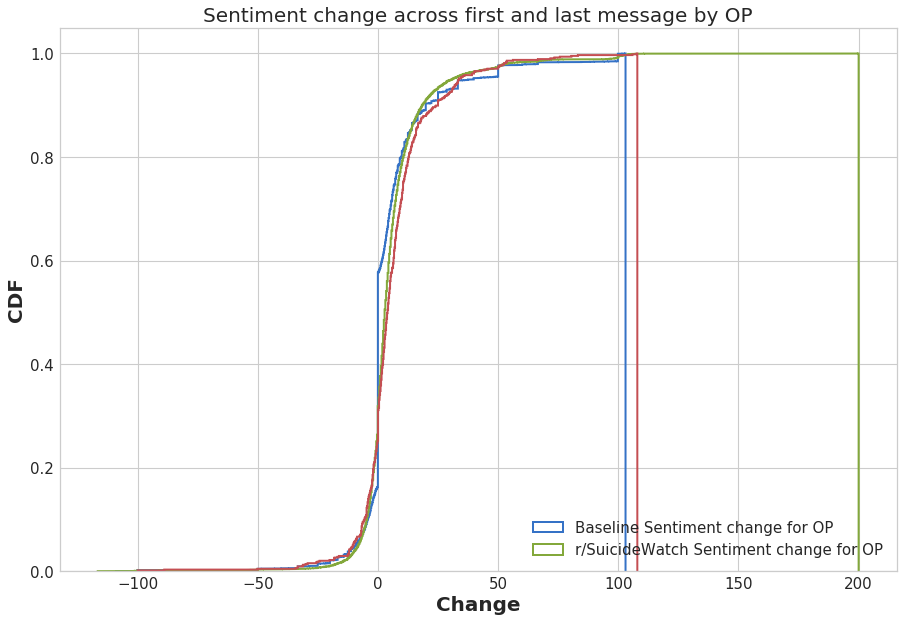

In [115]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
n1 , bins1 , patches1 = plt.hist(BL_OPSentiDiff, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2, bins2 , patches2 = plt.hist(SW_OPSentiDiff, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n3, bins3 , patches3 = plt.hist(Dep_OPSentiDiff, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)


plt.title("Sentiment change across first and last message by OP", fontsize = 20)
plt.xlabel("Change",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['Baseline Sentiment change for OP', 'r/SuicideWatch Sentiment change for OP' ], loc='lower right',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

In [116]:
print len(BL_OPSentiDiff), len(SW_OPSentiDiff)

stats , pvalue = findMannWhitney(BL_OPSentiDiff , SW_OPSentiDiff)
print stats , pvalue
normstats , normpvalue = findMannWhitney(BL_OPSentiDiff , BL_OPSentiDiff)
print stats/normstats, pvalue

7058 9860
22387598.0 5.743124235001789e-26
Samples are same size, no need to resample
0.8988230217488725 5.743124235001789e-26


Text(0.5,71.4,'Time in minutes')

Text(67.775,0.5,'Change in sentiment between first and last message(sorted by time)')

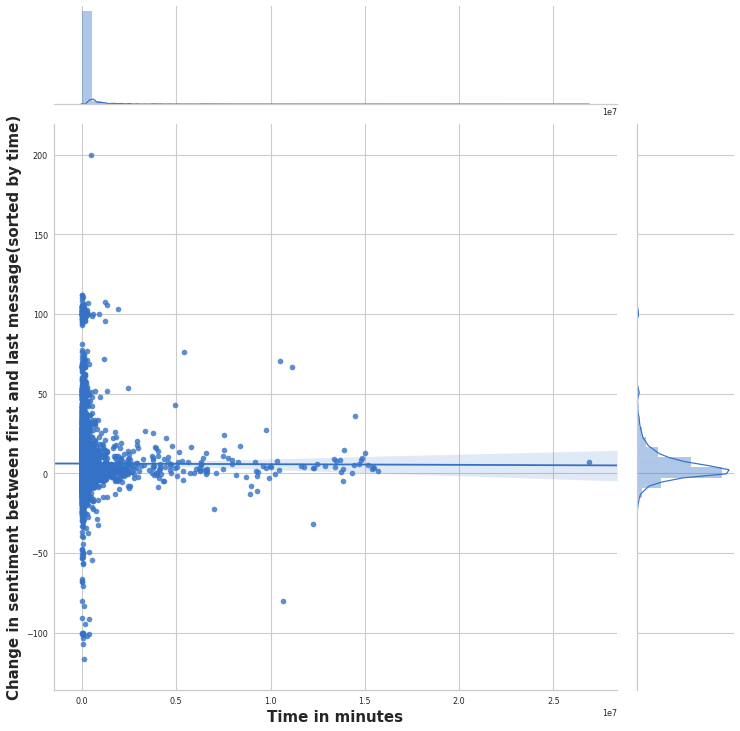

In [117]:
sns.jointplot(x = np.asarray(SW_OPTimeDiff) , y = np.asarray(SW_OPSentiDiff) , kind='reg' ,size = 10);
plt.xlabel("Time in minutes", fontsize = 15)
plt.ylabel("Change in sentiment between first and last message(sorted by time)", fontsize = 15)

In [118]:
SW_timeDist = getTimeDistribution(filteredReply_SW,opAuthors_SW)
BL_timeDist = getTimeDistribution(filteredReply_BL,opAuthors_BL)
Dep_timeDist = getTimeDistribution(filteredReply_Dep,opAuthors_Dep)

Author not found


In [119]:
SW_AllTimeDist = getAllTimeDifferences(filteredReply_SW)
BL_AllTimeDist = getAllTimeDifferences(filteredReply_BL)
Dep_AllTimeDist = getAllTimeDifferences(filteredReply_Dep)

 Time not found


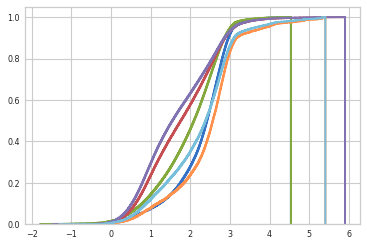

In [138]:
n1 , bins1 , patches1 = plt.hist(np.log10(BL_timeDist), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(np.log10(BL_AllTimeDist), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n3 , bins3 , patches3 = plt.hist(np.log10(SW_timeDist), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n4 , bins4 , patches4 = plt.hist(np.log10(SW_AllTimeDist), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n5 , bins5 , patches5 = plt.hist(np.log10(Dep_timeDist), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n6 , bins6 , patches6 = plt.hist(np.log10(Dep_AllTimeDist), 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)


Text(0.5,1,'Response time to posts by OP')

Text(0.5,0,'Time in minutes (log10)')

Text(0,0.5,'CDF')

(array([-3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.]),
 <a list of 11 Text xticklabel objects>)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

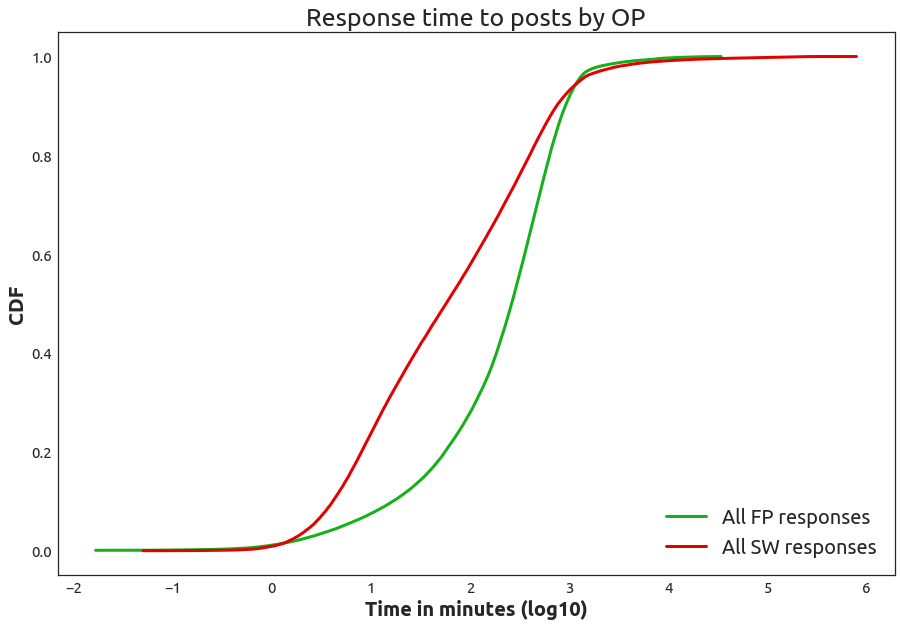

In [143]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

ax.plot(bins1[:-1], n1, mcd.XKCD_COLORS['xkcd:green'], linewidth=3)
# ax.plot(bins2[:-1], n2, mcd.XKCD_COLORS['xkcd:green'], linestyle='--' ,linewidth=3)
ax.plot(bins3[:-1], n3, mcd.XKCD_COLORS['xkcd:red'], linewidth=3)
# ax.plot(bins4[:-1], n4, mcd.XKCD_COLORS['xkcd:red'],  linestyle='--' ,linewidth=3)
# ax.plot(bins5[:-1], n5, 'r', linewidth=2)
# ax.plot(bins6[:-1], n6, 'r--', linewidth=2)

plt.title("Response time to posts by OP", fontsize = 25)
plt.xlabel("Time in minutes (log10)",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
# plt.legend(['FP responses for OP', 'All FP responses' , 'SW responses to OP' , 'All SW responses'], loc='lower right',fontsize=20)
plt.legend(['All FP responses' , 'All SW responses'], loc='lower right',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

In [122]:
BL_messageParti , BL_userParti , BL_bpusers = getSymmetricBehaviour(filteredUGraphs_BL,opAuthors_BL)

In [123]:
SW_messageParti , SW_userParti , SW_bpusers = getSymmetricBehaviour(filteredUGraphs_SW,opAuthors_SW)

In [124]:
Dep_messageParti , Dep_userParti, Dep_bpusers = getSymmetricBehaviour(filteredUGraphs_Dep,opAuthors_Dep)

In [125]:
len(Dep_messageParti)

846

In [126]:
max(SW_messageParti)

0.6153846153846154

In [127]:
# BPusers['26i7k4']

In [128]:
# nx.draw_networkx(filteredUserGraphs['35flze'])

Text(0.5,1,'Fraction of symmetric messages on a thread')

Text(0.5,0,'Fraction')

Text(0,0.5,'CDF')

(array([-0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7]),
 <a list of 9 Text xticklabel objects>)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 <a list of 7 Text yticklabel objects>)

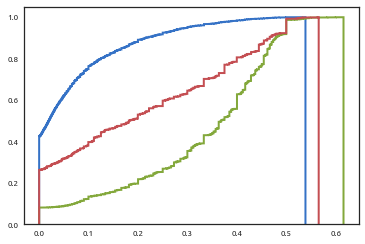

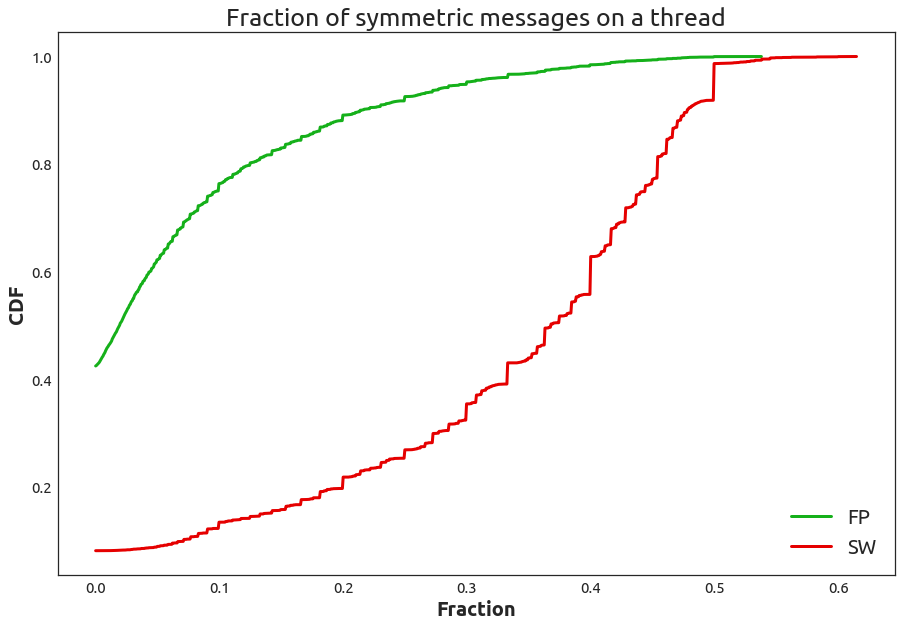

In [147]:
n1 , bins1 , patches1 = plt.hist(BL_messageParti, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(SW_messageParti, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n3 , bins3 , patches3 = plt.hist(Dep_messageParti, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

ax.plot(bins1[:-1], n1, mcd.XKCD_COLORS['xkcd:green'], linewidth=3)
ax.plot(bins2[:-1], n2, mcd.XKCD_COLORS['xkcd:red'], linewidth=3)
# ax.plot(bins3[:-1], n3, 'r', linewidth=2)

plt.title("Fraction of symmetric messages on a thread", fontsize = 25)
plt.xlabel("Fraction",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['FP','SW'], loc='lower right',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

In [148]:
print np.median(BL_messageParti) , np.mean(BL_messageParti)
print np.median(SW_messageParti) , np.mean(SW_messageParti)

0.019801980198019802 0.0682055934622126
0.3684210526315789 0.32513117750158615


In [131]:
print len(BL_messageParti), len(SW_messageParti)

stats , pvalue = findMannWhitney(BL_messageParti , SW_messageParti)
print stats , pvalue
normstats , normpvalue = findMannWhitney(BL_messageParti , BL_messageParti)
print stats/normstats, pvalue

11070 10527
12401526.0 0.0
Samples are same size, no need to resample
0.20239970818859046 0.0


Text(0.5,1,'Fraction users participating in symmetric messages ')

Text(0.5,0,'Fraction')

Text(0,0.5,'CDF')

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 7 Text xticklabel objects>)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 <a list of 7 Text yticklabel objects>)

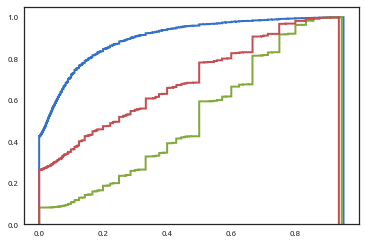

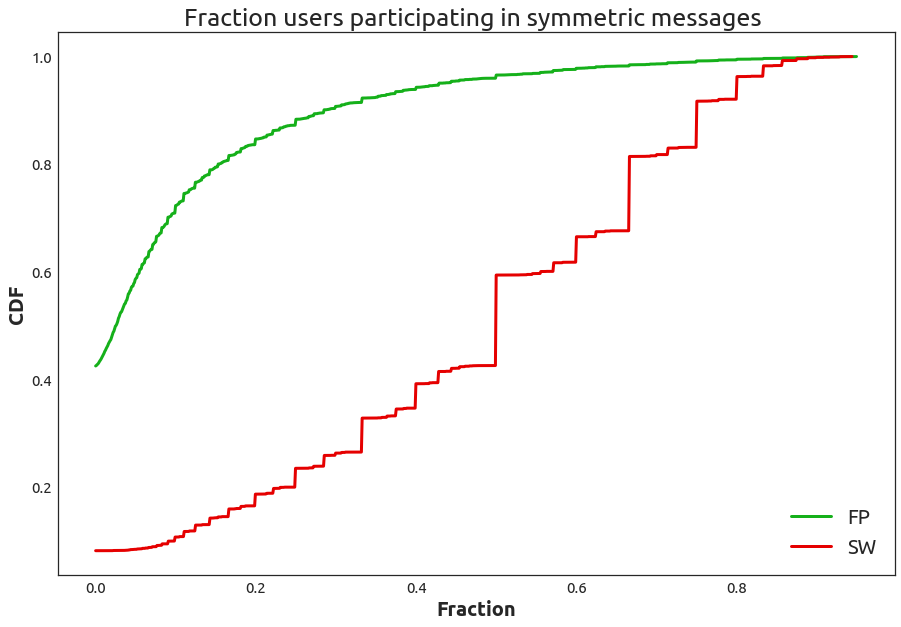

In [144]:
n1 , bins1 , patches1 = plt.hist(BL_userParti, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(SW_userParti, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n3 , bins3 , patches3 = plt.hist(Dep_userParti, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)

fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

# ax.plot(bins3[:-1], n3, 'r', linewidth=2)

plt.title("Fraction users participating in symmetric messages ", fontsize = 25)
plt.xlabel("Fraction",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['FP','SW'], loc='lower right',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

In [133]:
print np.median(BL_userParti) , np.mean(BL_userParti)
print np.median(SW_userParti) , np.mean(SW_userParti)
print np.median(Dep_userParti) , np.mean(Dep_userParti)

0.026607669616519176 0.09440856127613712
0.5 0.4658514824184498
0.25 0.2921170669594551


In [134]:
print len(BL_userParti), len(SW_userParti)

stats , pvalue = findMannWhitney(BL_userParti , SW_userParti)
print stats , pvalue
normstats , normpvalue = findMannWhitney(BL_userParti , BL_userParti)
print stats/normstats, pvalue

11070 10527
13289887.0 0.0
Samples are same size, no need to resample
0.21689824709147423 0.0


In [135]:
len(opAuthors_SW) , len(SW_bpusers)

(11437, 10527)

In [136]:
def getDepthEmoDist(graphs , bpUsers , opUsers):
    rootEmoDict = {}
    BPUserEmoDict = {}
    for k in bpUsers:
        if k in opUsers:
            for i , d in graphs[k].nodes(data=True):
                if 'author' in d:
                    if d['author'] == opUsers[k]:
                        depth = d['depth']
                        if depth not in rootEmoDict:
                            rootEmoDict[depth] = []
                        rootEmoDict[depth].append(d['affects'])
                    elif d['author'] in bpUsers[k]:
                        depth = d['depth']
                        if depth not in BPUserEmoDict:
                            BPUserEmoDict[depth] = []
                        BPUserEmoDict[depth].append(d['affects'])
    return rootEmoDict , BPUserEmoDict

def getMeanError(emoDict, depthMax):
    MeanAffects =[]
    Error = []
    for k in range(0,depthMax):
        if k in emoDict:
            MeanAffects.append(np.mean(emoDict[k]))
            Error.append(np.std(emoDict[k])/float(len(emoDict[k])))
        else:
            print len(MeanAffects)
            MeanAffects.append(MeanAffects[-1])
            Error.append(Error[-1])
    return MeanAffects , Error


# def get

In [132]:
SW_rootEmoDict , SW_bpUserEmoDict = getDepthEmoDist(filteredReply_SW,SW_bpusers,opAuthors_SW)


In [133]:
SW_rootMean , SW_rootError = getMeanError(SW_rootEmoDict,50)


In [134]:
SW_BPMean , SW_BPError = getMeanError(SW_bpUserEmoDict,50)
print len(SW_rootMean) , len(SW_rootError) , len(SW_BPError) , len(SW_BPMean)

50 50 50 50


In [135]:
len(SW_bpUserEmoDict[0])

29133

In [136]:
BL_rootEmoDict , BL_bpUserEmoDict = getDepthEmoDist(filteredReply_BL,BL_bpusers,opAuthors_BL)
BL_rootMean , BL_rootError = getMeanError(BL_rootEmoDict,50)
BL_BPMean , BL_BPError = getMeanError(BL_bpUserEmoDict,50)
print len(BL_rootMean) , len(BL_rootError) , len(BL_BPMean) , len(BL_BPError)

24
26
28
30
31
32
33
34
36
37
38
39
40
41
42
43
44
45
46
47
48
49
44
46
48
50 50 50 50


In [137]:
# sns.distplot(rootEmoDict[7])

<Container object of 3 artists>

<Container object of 3 artists>

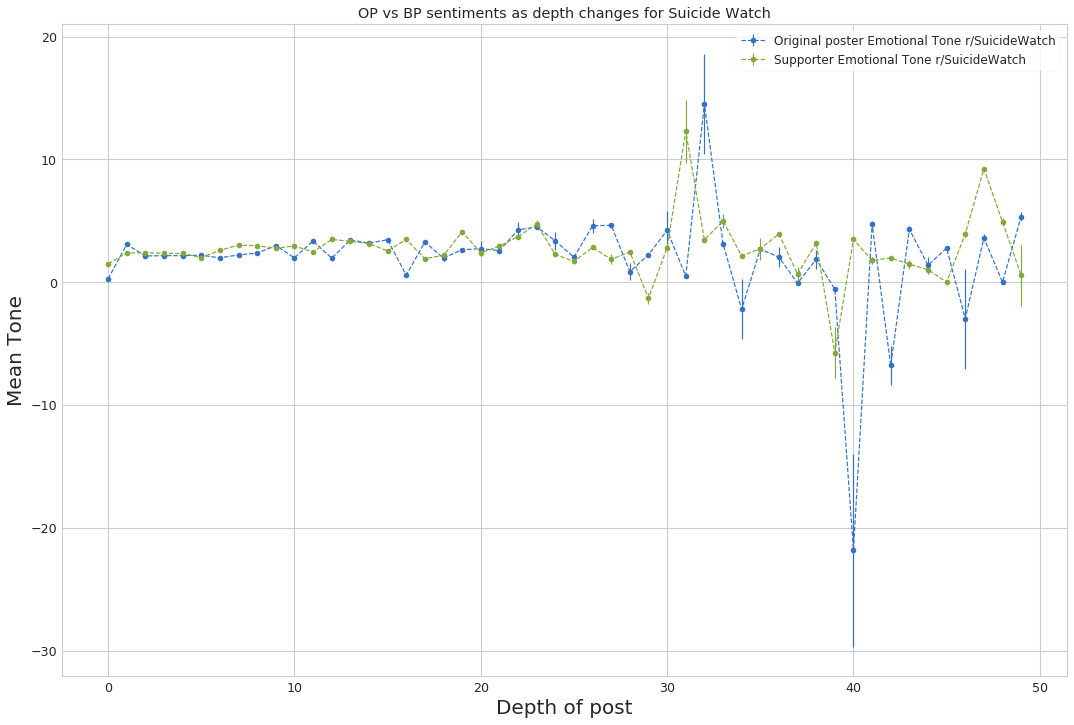

In [138]:
fig, ax = plt.subplots()
fig.set_size_inches(18,12)
ax.errorbar(np.arange(0, 50, 1),SW_rootMean , yerr=SW_rootError, fmt='--o')
ax.errorbar(np.arange(0, 50, 1),SW_BPMean , yerr=SW_BPError, fmt='--o')
plt.title("OP vs BP sentiments as depth changes for Suicide Watch")
plt.xlabel("Depth of post" , fontsize = 20)
plt.ylabel("Mean Tone" , fontsize = 20)
plt.legend(['Original poster Emotional Tone r/SuicideWatch','Supporter Emotional Tone r/SuicideWatch'],fontsize=12)

<Container object of 3 artists>

<Container object of 3 artists>

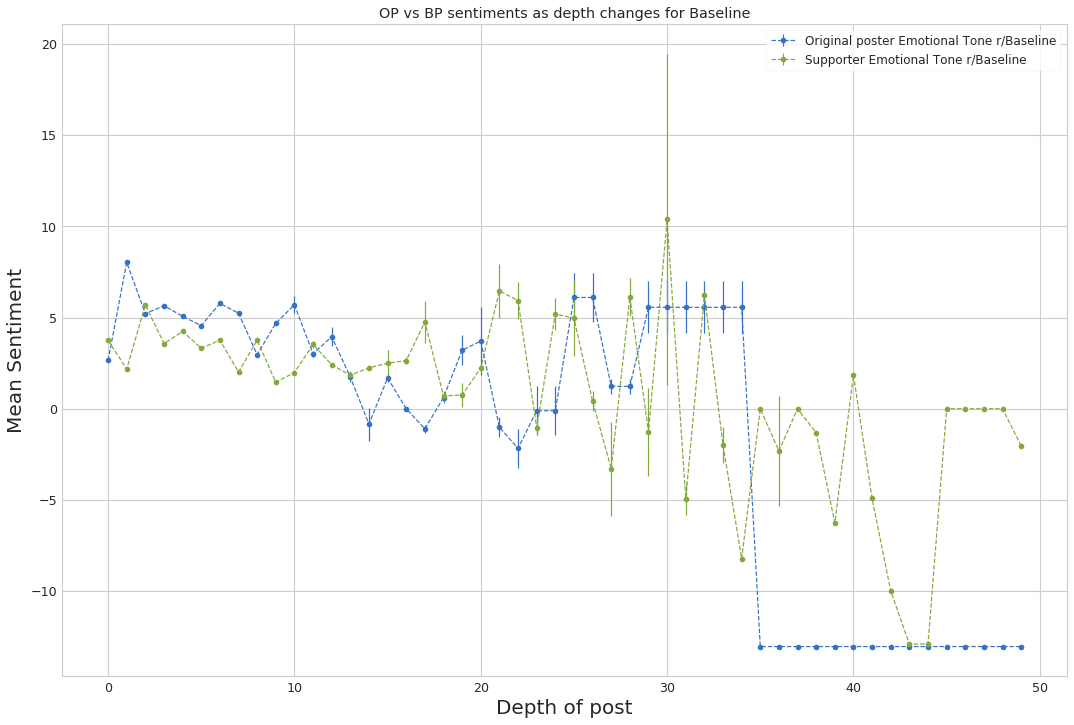

In [139]:
fig, ax = plt.subplots()
fig.set_size_inches(18,12)
ax.errorbar(np.arange(0, 50, 1),BL_rootMean , yerr=BL_rootError, fmt='--o')
ax.errorbar(np.arange(0, 50, 1),BL_BPMean , yerr=BL_BPError, fmt='--o')
plt.title("OP vs BP sentiments as depth changes for Baseline")
plt.xlabel("Depth of post" , fontsize = 20)
plt.ylabel("Mean Sentiment" , fontsize = 20)
plt.legend(['Original poster Emotional Tone r/Baseline' , 'Supporter Emotional Tone r/Baseline'], fontsize=12)

In [140]:
triangleDist_SW = [np.log10(sum(list(nx.triangles(filteredUGraphs_SW[k].to_undirected()).values()))/3 + 1) for k in filteredUGraphs_SW]
triangleDist_BL = [np.log10(sum(list(nx.triangles(filteredUGraphs_BL[k].to_undirected()).values()))/3 + 1) for k in filteredUGraphs_BL]
triangleDist_Dep = [np.log10(sum(list(nx.triangles(filteredUGraphs_Dep[k].to_undirected()).values()))/3 + 1) for k in filteredUGraphs_Dep]

(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ]),
 <a list of 8 Text xticklabel objects>)

(array([ 0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1]),
 <a list of 8 Text yticklabel objects>)

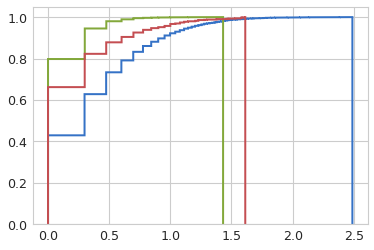

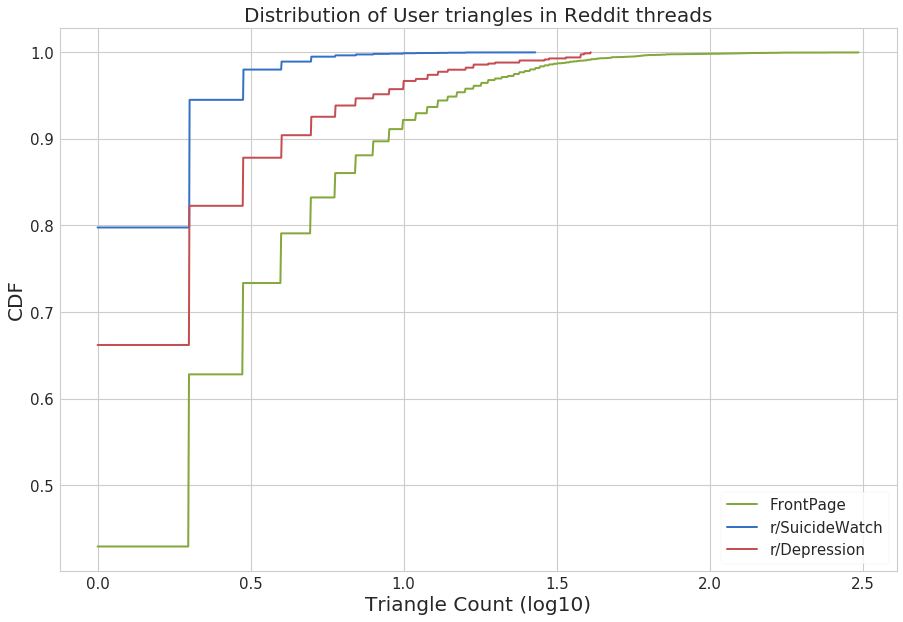

In [141]:
n1 , bins1 , patches1 = plt.hist(triangleDist_BL, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(triangleDist_SW, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n3 , bins3 , patches3 = plt.hist(triangleDist_Dep, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)

fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ax.plot(bins1[:-1], n1, 'g', linewidth=2)
ax.plot(bins2[:-1], n2, 'b', linewidth=2)
ax.plot(bins3[:-1], n3, 'r', linewidth=2)

plt.title("Distribution of User triangles in Reddit threads", fontsize = 20)
plt.xlabel("Triangle Count (log10)",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['FrontPage','r/SuicideWatch','r/Depression'], loc='lower right',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

In [142]:
print len(triangleDist_BL), len(triangleDist_SW)

stats , pvalue = findMannWhitney(triangleDist_BL , triangleDist_SW)
print stats , pvalue
normstats , normpvalue = findMannWhitney(triangleDist_BL , triangleDist_BL)
print stats/normstats, pvalue

11070 10527
32105335.0 0.0
Samples are same size, no need to resample
0.5239766812 0.0


In [143]:
isinstance(LIWC_SW.iloc[0]['B'],unicode)

False

In [144]:
# SW_Posts = []
# for index, row in LIWC_SW.iterrows():
#     SW_Posts.append(str(row['B']).decode("utf-8", "ignore"))
    


In [145]:
# len(SW_Posts)

In [146]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
from gensim.models.ldamulticore import *
import gensim
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from nltk.tokenize.treebank import TreebankWordTokenizer
import spacy
from spacy.lang.en import English
from __future__ import unicode_literals

In [147]:
class Tokenizer:
    def __init__(self):
#         print "Created Tokenizer"
        self.regExTknizr = RegexpTokenizer(r'\w+')
        self.tweetTknizr = TweetTokenizer()
        self.treebankTknizer = TreebankWordTokenizer()
        nlp = English()
#         self.spacytokenizer = English().Defaults.create_tokenizer(nlp)
        self.spacytokenizer = nlp.tokenizer
        
    def tokenizeByRegEx(self , text):
        return self.regExTknizr.tokenize(text)
    
    def tokenizeTweets(self,text):
        return self.tweetTknizr.tokenize(text)
    
    def simpleTokenizer(self, text):
        return text.strip().split()

    def gensimTokenizer(self , text):
        return gensim.utils.simple_tokenize(text)
    
    def wordTokenizer(self, text):
        return word_tokenize(text.strip())
    
    def treebankTokenize(self, text):
        return self.treebankTknizer.tokenize(text.strip())
    
    def spacyTokenize(self,text):
        return self.spacytokenizer(text.strip())

    
    
# create English stop words list
en_stop = get_stop_words('en')
# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()

def check(u1 , ulist):
    if u1 in ulist:
        return True
    else:
        return False

def getOPTexts(replyGraphs , users):
    texts = []
    for k in replyGraphs:
        g = replyGraphs[k]
        for node in g:
            if 'author' in g.node[node]:
                if g.node[node]['author'] == users[k]:
                    if g.node[node]['text'] == '[deleted]':
                        continue
                    texts.append(g.node[node]['text'].decode("utf-8", "ignore"))
    return texts

def getBPTexts(replyGraphs , users):
    texts = []
    for k in replyGraphs:
        g = replyGraphs[k]
        for node in g:
            if 'author' in g.node[node]:
                if k not in users:
                    continue
                if check(g.node[node]['author'],users[k]):
                    if g.node[node]['author'] in users[k]:
                        if g.node[node]['text'] == '[deleted]':
                            continue
                        texts.append(g.node[node]['text'].decode("utf-8", "ignore"))
    return texts

def getIRTexts(replyGraphs , op , bp):
    texts = []
    for k in replyGraphs:
        g = replyGraphs[k]
        for node in g:
            if 'author' in g.node[node]:
                if k not in op or k not in bp:
                    continue
                checkList = [op[k]] + bp[k]
                if not check(g.node[node]['author'],checkList):
                    if g.node[node]['text'] == '[deleted]':
                        continue
                    texts.append(g.node[node]['text'].decode("utf-8", "ignore"))
    return texts

def getAllText(replyGraphs):
    texts = []
    for k in replyGraphs:
        g = replyGraphs[k]
        for node in g:
            if 'text' not in g.node[node]:
                print g.node[node]
                continue
            if g.node[node]['text'] == '[deleted]':
                continue
            texts.append(g.node[node]['text'].decode("utf-8", "ignore"))
    return texts

def tokenizeTexts(testList):
    # list for tokenized documents in loop
    toc_texts = []
    # loop through document list
    tokenizer = Tokenizer()
    for i in testList:
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.spacyTokenize(raw)
#         print tokens
        # remove stop words from tokens
        stopped_tokens = [i.orth_ for i in tokens if not i.orth_ in en_stop]
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        # add tokens to list
        toc_texts.append(stemmed_tokens)
    return toc_texts

def tokenizeTextsSpacy(textList):
    toc_texts = []
    tokenizer = Tokenizer()
    for i in textList:
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.spacyTokenize(raw)
        cleaned_tokens = [token.orth_ for token in tokens if not token.is_punct | token.is_space | token.is_stop ]
        toc_texts.append(cleaned_tokens)
    return toc_texts

def getTextTopicsSpacyMulticore(text,model):
    tokenizer = Tokenizer()
    raw = text.lower()
    tokens = tokenizer.spacyTokenize(raw)
    cleaned_tokens = [token.orth_ for token in tokens if not token.is_punct | token.is_space | token.is_stop ]
    topics = model.get_document_topics(dictionary.doc2bow(cleaned_tokens))
    return topics

def getdocVec(text,model):
    tokenizer = Tokenizer()
    raw = text.lower()
    tokens = tokenizer.spacyTokenize(raw)
    cleaned_tokens = [token.orth_ for token in tokens if not token.is_punct | token.is_space | token.is_stop ]
    vector = model.infer_vector(cleaned_tokens)
    return vector
        
def getTextTopics(text,model):
    raw = text.lower()
    tokenizer = Tokenizer()
    tokens = tokenizer.tokenizeByRegEx(raw)
    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
#     print stemmed_tokens
    topics = model.get_document_topics(dictionary.doc2bow(stemmed_tokens))
    return topics

In [148]:
# len(opAuthors_SW), len(allGraphs_SW)

In [149]:
# SW_bpusers_all

In [150]:
# print len(SW_bpusers_all)
# with open("BpUserDict.pkl",'wb') as f:
#     pkl.dump(SW_bpusers_all,f)

In [151]:
Multiple_BP = {}
allUsers = []
for k in SW_bpusers:
    for u in SW_bpusers[k]:
        if u in allUsers:
            if u not in Multiple_BP:
                Multiple_BP[u] = 2
            else:
                Multiple_BP[u]+=1
        else:
            allUsers.append(u)
    
    

In [152]:
del Multiple_BP['[deleted]']

In [153]:
len(Multiple_BP)

2879

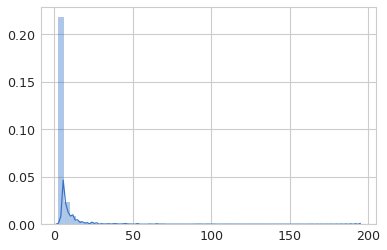

In [154]:
sns.distplot(Multiple_BP.values())

In [155]:
SW_multbpUsers = {}
for k in SW_bpusers:
    SW_multbpUsers[k] = []
    for m in SW_bpusers[k]:
        if m in Multiple_BP.keys():
            SW_multbpUsers[k].append(m)

In [156]:
# with open("multipleBP.pkl",'wb') as f:
#     pkl.dump(SW_multbpUsers,f)

In [157]:
len(SW_bpusers)

10527

In [158]:
SW_IR_posts = getIRTexts(filteredReply_SW,opAuthors_SW,SW_bpusers)

In [159]:
SW_Texts = getAllText(filteredReply_SW)

{}


In [160]:
BL_Texts = getAllText(filteredReply_BL)

In [161]:
Dep_texts = getAllText(filteredReply_Dep)

In [162]:
len(filteredReply_BL),len(filteredReply_SW),len(filteredReply_Dep)

(11070, 10527, 846)

In [163]:
len(SW_Texts),len(BL_Texts),len(Dep_texts)

(206009, 859455, 24294)

In [164]:
# SW_IR_posts[:4]

In [165]:
opAuthors_SW['pfn0u']

u'Heroic_Dose'

In [166]:
SW_OP_posts = getOPTexts(filteredReply_SW,opAuthors_SW)


In [167]:
len(SW_OP_posts)

82027

In [168]:
# SW_OP_posts[:10]

In [169]:
SW_BP_posts = getBPTexts(filteredReply_SW, SW_bpusers)

In [170]:
SW_MultBP_posts = getBPTexts(filteredReply_SW,SW_multbpUsers)

In [171]:
len(SW_MultBP_posts)

41191

In [172]:
len(SW_BP_posts)

83116

In [173]:
# SW_BP_posts[:10]

In [174]:
# sampled_SW_IR_Posts = random.sample(SW_IR_posts,len(SW_BP_posts))

In [175]:
len(SW_OP_posts) , len(SW_BP_posts)

(82027, 83116)

In [176]:
# OP_tokenized = tokenizeTexts(SW_OP_posts)
# BP_tokenized = tokenizeTexts(SW_BP_posts)
# IR_tokenized = tokenizeTexts(SW_IR_posts)

In [177]:
All_cleaned = tokenizeTexts(SW_Texts)

In [178]:
BL_cleaned = tokenizeTexts(BL_Texts)

In [179]:
Dep_cleaned = tokenizeTexts(Dep_texts)

In [180]:
# MultBP_tokenized = tokenizeTexts(SW_MultBP_post

In [181]:
len(All_cleaned) , len(BL_cleaned)

(206009, 859455)

In [182]:
# len(OP_tokenized) , len(BP_tokenized)

In [183]:
# OP_tokenized[1]

In [184]:
# %store All_cleaned
# %store BL_cleaned
%store -r All_cleaned
%store -r BL_cleaned

In [185]:
#turn our tokenized documents into a id <-> term dictionary
dictionary = gensim.corpora.Dictionary(All_cleaned)
dictionary_Dep = gensim.corpora.Dictionary(Dep_cleaned)
# dictionary_BP =gensim.corpora.Dictionary(BP_tokenized)
# dictionary_IR =gensim.corpora.Dictionary(IR_tokenized)

dictionary_BL = gensim.corpora.Dictionary(BL_cleaned)

In [186]:
# len(dictionary_BP), len(dictionary_IR)
len(dictionary) , len(dictionary_BL) , len(dictionary_Dep)

(152791, 468018, 23349)

In [187]:
# len(dictionary_OP) , len(dictionary_BP)

In [188]:
# convert tokenized documents into a document-term matrix
# corpus_OP = [dictionary.doc2bow(text) for text in OP_cleaned_text]
# corpus_BP = [dictionary.doc2bow(text) for text in BP_tokenized]
# corpus_IR = [dictionary.doc2bow(text) for text in IR_tokenized]

In [189]:
All_SWcorpus = [dictionary.doc2bow(text) for text in All_cleaned]
All_BLcorpus = [dictionary_BL.doc2bow(text) for text in BL_cleaned]
All_Depcorpus = [dictionary_Dep.doc2bow(text) for text in Dep_cleaned]

In [190]:
len(All_SWcorpus) , len(All_BLcorpus)

(206009, 859455)

In [191]:
sampled_corpus_SW = random.sample(All_SWcorpus,10000)
sampled_corpus_BL = random.sample(All_BLcorpus,10000)

In [192]:
# ldamodel = LdaMulticore(All_SWcorpus, id2word=dictionary, num_topics=40,workers=3) 
# ldamodel = gensim.models.ldamodel.LdaModel(sampled_corpus_SW, id2word=dictionary, num_topics=40) 

In [193]:
# ldamodel_BL = LdaMulticore(All_BLcorpus, id2word=dictionary_BL, num_topics=40,workers=3) 
# ldamodel_BL = gensim.models.ldamodel.LdaModel(sampled_corpus_BL, id2word=dictionary_BL, num_topics=100) 

In [194]:
# ldamodel_Dep = LdaMulticore(All_Depcorpus, id2word=dictionary_Dep, num_topics=40,workers=4) 
#ldamodel_Dep = gensim.models.ldamodel.LdaModel(All_Depcorpus, id2word=dictionary_Dep, num_topics=40) 

In [195]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.test.utils import common_texts

In [196]:
# documents_SW = [TaggedDocument(doc, [i]) for i, doc in enumerate(All_cleaned)]

# doc2Vec_SW = Doc2Vec(documents_SW, vector_size=128 , window=2, min_count=1, workers=5) 

In [197]:
# documents_BL = [TaggedDocument(doc, [i]) for i, doc in enumerate(BL_cleaned)]

# doc2Vec_BL = Doc2Vec(documents_BL, vector_size=128 , window=2, min_count=1, workers=5) 

In [198]:
# documents_Dep = [TaggedDocument(doc, [i]) for i, doc in enumerate(Dep_cleaned)]

# doc2Vec_Dep = Doc2Vec(documents_Dep, vector_size=128 , window=2, min_count=1, workers=5) 

In [199]:
# %store doc2Vec_SW
# %store doc2Vec_BL
# %store doc2Vec_Dep

%store -r doc2Vec_SW
%store -r doc2Vec_BL
%store -r doc2Vec_Dep

In [200]:
ldamodel = gensim.models.ldamodel.LdaModel.load("TopicModels/SW_allcorpus_model_v5")
ldamodel_BL = gensim.models.ldamodel.LdaModel.load("TopicModels/BL_allcorpus_model_v5")

In [201]:
ldamodel.num_topics
ldamodel_BL.num_topics
ldamodel_Dep.num_topics

80

50

NameError: name 'ldamodel_Dep' is not defined

In [ ]:
# pyLDAvis.enable_notebook()
# topic_display = pyLDAvis.gensim.prepare(topic_model=ldamodel,corpus=sampled_corpus_SW,dictionary=dictionary)
# pyLDAvis.display(topic_display)

In [ ]:
# pyLDAvis.display(topic_display)

In [ ]:
# pyLDAvis.enable_notebook()
# topic_display_BL = pyLDAvis.gensim.prepare(topic_model=ldamodel_BL,corpus=sampled_corpus_BL,dictionary=dictionary_BL)

In [ ]:
# pyLDAvis.display(topic_display_BL)

In [ ]:
# ldamodel.save("SW_allcorpus_model_v3_new")

In [ ]:
# ldamodel_BL.save("BL_allcorpus_model_v3_new")

In [ ]:


# turn on automatic rendering of visualizations
# pyLDAvis.enable_notebook()
# bp_topic_display = pyLDAvis.gensim.prepare(topic_model=ldamodel_BP,corpus=corpus_BP,dictionary=dictionary)
# pyLDAvis.display(bp_topic_display)

In [ ]:
# turn on automatic rendering of visualizations
# pyLDAvis.enable_notebook()

# ir_topic_display = pyLDAvis.gensim.prepare(topic_model=ldamodel_IR,corpus=corpus_IR,dictionary=dictionary)
# pyLDAvis.display(ir_topic_display)

In [ ]:
# ldamodel_BP.print_topics(10)

# ldamodel_OP.print_topics(10)



In [ ]:
# ldamodel_IR.print_topics(10)

In [ ]:
dictionary.values().index('harm')

In [ ]:
doc2Vec_BL.infer_vector

In [ ]:
# ldamodel.save("SW_Alltext.mdl")

In [202]:
topics1 = getdocVec("hello there this is the captain speaking, we are about to crash land. Brace for impact",doc2Vec_SW)
topics2 = getdocVec("Birds of same feathers flock together",doc2Vec_SW)
topics3 = getdocVec("Hello everyone, we are not going to crash land. This is the captain", doc2Vec_SW)

In [203]:
print topics1, topics2 , topics3

[ -4.00703065e-02   3.27967666e-02   1.17897309e-01  -3.61766643e-03
   5.77605739e-02  -5.58959134e-02  -9.40941349e-02  -1.79758165e-02
  -5.66827729e-02  -7.62267336e-02   2.89504826e-02   9.87644121e-02
   7.83583894e-02   4.06356603e-02   1.16449714e-01   3.56995165e-02
  -9.36879516e-02   9.88691822e-02  -5.57744876e-03   3.93826850e-02
   9.64985117e-02  -2.22675689e-02  -4.39708680e-02   1.96537580e-02
   8.17769021e-02   4.53332514e-02   5.83639927e-02   2.84422692e-02
   3.01871933e-02  -5.60756288e-02  -1.81903262e-02  -9.23578218e-02
   1.05858602e-01   1.82616822e-02  -1.37909474e-02   8.17880556e-02
   5.53682707e-02   4.73194104e-03   6.73131421e-02  -4.98834364e-02
   1.31008578e-02  -5.17142117e-02   2.31405646e-02   3.66015248e-02
   8.06517974e-02   2.24347096e-02   5.90544641e-02  -4.34764847e-02
  -9.92670842e-03  -9.91286635e-02  -1.02640189e-01  -1.53618634e-01
   7.79459253e-02   2.49636825e-02  -6.16048239e-02   1.45098884e-02
   2.02025212e-02  -1.05976574e-02

In [204]:
a = np.zeros(40)
a[10] = 100
print a

[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  100.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.]


In [205]:
from scipy import spatial
def findJaccardTopicsMetric(topicarray1, topicarray2):
    topicidx1 = [k[0] for k in topicarray1]
    topicidx2 = [k[0] for k in topicarray2]
    intersection = len(list(set(topicidx1).intersection(topicidx2)))
    union = (len(topicidx1) + len(topicidx2)) - intersection
    if union == 0.0:
        return 0.0
    return float(intersection) / float(union)

def findEuclideanTopicsMetric(topicarray1, topicarray2,topicDimension=40):
    topicidx1 = np.zeros(topicDimension)
    topicidx2 = np.zeros(topicDimension)
    for k in topicarray1:
        topicidx1[k[0]] = k[1]
    for k in topicarray2:
        topicidx2[k[0]] = k[1]
    return 1.0001-spatial.distance.euclidean(topicidx1,topicidx2)

def normalize(word_vec):
    norm=np.linalg.norm(word_vec)
    if norm == 0: 
        return word_vec
    return word_vec/norm

def docVecCosine(vec1, vec2):
    return 1.05 - spatial.distance.cosine(normalize(vec1),normalize(vec2))

def findCosineTopicsMetric(topicarray1, topicarray2,topicDimension=40):
    topicidx1 = np.zeros(topicDimension)
    topicidx2 = np.zeros(topicDimension)
    for k in topicarray1:
        topicidx1[k[0]] = k[1]
    for k in topicarray2:
        topicidx2[k[0]] = k[1]
    return 1.0001 - spatial.distance.cosine(topicidx1,topicidx2)

In [206]:
# print findEuclideanTopicsMetric(topics1 , topics2,topicDimension=80) , findEuclideanTopicsMetric(topics2,topics3,topicDimension=80) , findEuclideanTopicsMetric(topics1,topics3, topicDimension=80),

In [207]:
print docVecCosine(topics1 , topics2) , docVecCosine(topics2,topics3) , docVecCosine(topics1,topics3)

0.178980249166 0.50738658309 0.581017541885


In [ ]:
# print findCosineTopicsMetric(topics1 , topics2,topicDimension=80) , findCosineTopicsMetric(topics2,topics3,topicDimension=80) , findCosineTopicsMetric(topics1,topics3, topicDimension=80),

In [ ]:
filteredReply_SW[filteredReply_SW.keys()[100]].nodes(data=True)

In [ ]:

def createUserGraphsFromReply(allGraphs):
    userGraphs = {}
    for i in allGraphs:
        userGraph = nx.DiGraph()
        nodes = nx.get_node_attributes(allGraphs[i],'author')
        times = nx.get_node_attributes(allGraphs[i],'time')
        for e in allGraphs[i].edges(data=True):
            if e[0] not in nodes and e[1] not in nodes:
                continue
            elif e[0] not in nodes:
                print "Found Edge with deleted source"
                time = times[e[1]]
                src = "deleted"
                dst = nodes[e[1]]
            elif e[1] not in nodes:
                print "Found Edge with deleted destination"
                time = times[e[0]]
                src = nodes[e[0]]
                dst = "deleted"
            else:
                time = times[e[0]]
                src = nodes[e[0]]
                dst = nodes[e[1]]
                weight = e[2]['weight']
            if not userGraph.has_node(src):
                userGraph.add_node(src)
            if not userGraph.has_node(dst):
                userGraph.add_node(dst)  
            if not userGraph.has_edge(src,dst):
                userGraph.add_edge(src, dst , weight=weight , timestamp = time)
            else:
                orig = userGraph[src][dst]['weight']
                new = float(orig + weight)/2.0
                userGraph[src][dst]['weight'] = new
                if time > userGraph[src][dst]['timestamp']:
                    userGraph[src][dst]['timestamp'] = time
        userGraphs[i] = userGraph
    return userGraphs


import time
def createTopicalUserGraph(srcDestWeightList):
    userGraph = nx.DiGraph()
    for k in srcDestWeightList:
        src = k[0]
        dst = k[1]
        jaccard = k[2]
        time = k[3]
        
        if not userGraph.has_node(src):
            userGraph.add_node(src)
        if not userGraph.has_node(dst):
            userGraph.add_node(dst)  
        if not userGraph.has_edge(src,dst):
            userGraph.add_edge(src, dst , weight=jaccard , timestamp = time)
        else:
            if time > userGraph[src][dst]['timestamp']:
                userGraph[src][dst]['timestamp'] = time
            origWeight = userGraph[src][dst]['weight']
            update = float((origWeight + jaccard))/2.0
            userGraph[src][dst]['weight'] = update
    return userGraph
    
def createTopicGraphs(replyGraphs,ldaModel, topicDimensions, deletedUsers=None,logfile=None):
    topicGraphs = {}
    index = 0
    total = len(replyGraphs)
    for i in replyGraphs:
        index+=1
        start_t = time.time()
        deleted = nx.get_node_attributes(replyGraphs[i], 'author').values().count('[deleted]')
        if deletedUsers:
            if deleted > deletedUsers:
                continue
#         userGraph = nx.DiGraph()
        nodes = nx.get_node_attributes(replyGraphs[i],'author')
        texts = nx.get_node_attributes(replyGraphs[i],'text')
        times = nx.get_node_attributes(replyGraphs[i],'time')
        srcDestWeightList = []
        for e in replyGraphs[i].edges():
            if e[0] not in nodes and e[1] not in nodes:
                continue
            elif e[0] not in nodes:
                print "Found Edge with deleted source"
                utime = times[e[1]]
                src = "deleted"
                dst = nodes[e[1]]
            elif e[1] not in nodes:
                print "Found Edge with deleted destination"
                utime = times[e[0]]
                src = nodes[e[0]]
                dst = "deleted"
            else:
                utime = times[e[0]]
                src = nodes[e[0]]
                dst = nodes[e[1]]
            
            if e[0] in texts and e[1] in texts:
#                 topicSrc = getTextTopicsSpacy(texts[e[0]].decode("utf-8", "ignore"),ldaModel)
#                 topicDest = getTextTopicsSpacy(texts[e[1]].decode("utf-8", "ignore"),ldaModel)
#                 jaccard = findEuclideanTopicsMetric(topicSrc, topicDest,topicDimension=topicDimensions)
                topicSrc = getdocVec(texts[e[0]].decode("utf-8", "ignore"),ldaModel)
                topicDest = getdocVec(texts[e[1]].decode("utf-8", "ignore"),ldaModel)
                jaccard = docVecCosine(topicSrc, topicDest)
            else:
                jaccard = 0.00001
            replyGraphs[i][e[0]][e[1]]['weight'] = jaccard
            srcDestWeightList.append((src,dst,jaccard,utime))
        topicGraphs[i] = createTopicalUserGraph(srcDestWeightList)#userGraph
        end_t = time.time()
        print "executed graph in %f seconds"%(end_t-start_t)
        logging.debug("createTopicGraphs::executed %d th graph in %f seconds, total graph %d",index,float(end_t-start_t),total) 
    return topicGraphs
    

In [ ]:
# topicUserGraphs = createTopicGraphs(filteredReply_SW,model_SW,topicDimensions=128)

In [ ]:
filteredReply_Dep[filteredReply_Dep.keys()[1]].edges(data=True)

In [ ]:
topicUserGraphs_Dep = createTopicGraphs(filteredReply_Dep,doc2Vec_Dep,topicDimensions=128)

In [ ]:
for i, v in enumerate(topicUserGraphs_Dep[topicUserGraphs_Dep.keys()[1]]):
    print i , v 

In [ ]:
m = {v: i for i, v in enumerate(topicUserGraphs_Dep[topicUserGraphs_Dep.keys()[1]])}
print m

In [ ]:
drawUserGraph(topicUserGraphs_Dep[topicUserGraphs_Dep.keys()[1]])

In [ ]:
topicUserGraphs_SW = createTopicGraphs(filteredReply_SW,doc2Vec_SW, topicDimensions=128)

In [ ]:
topicUserGraphs_BL = createTopicGraphs(filteredReply_BL,doc2Vec_BL, topicDimensions=128)

In [ ]:
# %store topicUserGraphs_Dep

In [ ]:
# topicUserGraphs[filteredReply_SW.keys()[100]].edges(data=True)

In [ ]:
# %store filteredReply_SW
# %store topicUserGraphs

In [ ]:
# subsample = [k for k in allGraphs_BL of allGraphs_BL[k].nodes() > 4]
# sampled_BL = {}
# for k in subsample:
#     sampled_BL[k] = allGraphs_BL[k]

In [ ]:
# len(topicUserGraphs)

In [ ]:
# topicUserGraphs_BL = createTopicGraphs(filteredReply_BL,model_BL,topicDimensions=128)

In [ ]:
# topicUserGraphs_BL = createUserGraphsFromReply(filteredReply_BL)

In [ ]:
# %store filteredReply_BL
# %store topicUserGraphs_BL
%store -r filteredReply_BL
%store -r topicUserGraphs_BL

In [ ]:
# Save Topic Graphs: 
# with open("../Data/Dep_TopicUgraphs_Doc2Vec_Cosine.pkl",'wb') as f:
#     pkl.dump(file=f , obj=topicUserGraphs_Dep)
# with open("../Data/Dep_TopicReplygraphs_Doc2Vec_Cosine.pkl",'wb') as f:
#     pkl.dump(file=f , obj=filteredReply_Dep)

In [ ]:
#Save Topic Graphs: 
# with open("../Data/SW_TopicUgraphs_Doc2Vec_Cosine_V2.pkl",'wb') as f:
#     pkl.dump(file=f , obj=topicUserGraphs)
# logging.debug("!!!Done writing SW topical Graphs!!!") 

# #Save Topic Graphs: 
# with open("../Data/BL_TopicUgraphs_Doc2Vec_Cosine_V2.pkl",'wb') as f:
#     pkl.dump(file=f , obj=topicUserGraphs_BL)
# logging.debug("!!!Done writing BL topical Graphs!!!") 

#Save Reply Graphs: 
# with open("../Data/BL_TopicReplygraphs_Doc2Vec_Cosine_V2.pkl",'wb') as f:
#     pkl.dump(file=f , obj=filteredReply_BL)
# logging.debug("!!!Done writing BL Reply Graphs!!!") 

# with open("../Data/SW_TopicReplygraphs_Doc2Vec_Cosine_V2.pkl",'wb') as f:
#     pkl.dump(file=f , obj=filteredReply_SW)
# logging.debug("!!!Done writing SW Reply Graphs!!!") 

In [ ]:
sizes = {}
for k in topicUserGraphs:
    sizes[k] = len(topicUserGraphs[k].nodes())

In [ ]:
import operator
max(sizes.iteritems(), key=operator.itemgetter(1))[0]

In [ ]:
nx.write_gexf(topicUserGraphs['dltcq'] , "LargestSW.gexf",encoding="utf-8",prettyprint=True)

In [ ]:
nx.write_gexf(filteredReply_SW['dltcq'] , "LargestSW_Repl.gexf",encoding="utf-8",prettyprint=True)

In [ ]:
# drawUserGraph(topicUserGraphs_BL['7yv9cz'])

In [ ]:
def createGiantTopicGraph(allGraphs,ldaModel,deletedUsers=None):
    userGraph = nx.DiGraph()
    for i in allGraphs:
        deleted = nx.get_node_attributes(allGraphs[i], 'author').values().count('[deleted]')
        if deletedUsers:
            if deleted > deletedUsers:
                continue
#         userGraph = nx.DiGraph()
        nodes = nx.get_node_attributes(allGraphs[i],'author')
        texts = nx.get_node_attributes(allGraphs[i],'text')
        for e in allGraphs[i].edges():
            if e[0] not in nodes and e[1] not in nodes:
                continue
            elif e[0] not in nodes:
                src = "deleted"
                dst = nodes[e[1]]
            elif e[1] not in nodes:
                src = nodes[e[0]]
                dst = "deleted"
            else:
                src = nodes[e[0]]
                dst = nodes[e[1]]
            if e[0] in texts and e[1] in texts:
                topicSrc = getTextTopics(texts[e[0]].decode("utf-8", "ignore"),ldaModel)
                topicDest = getTextTopics(texts[e[1]].decode("utf-8", "ignore"),ldaModel)
                jaccard = findJaccardTopicsMetric(topicSrc , topicDest)
            else:
                jaccard = 0.0
            
            if not userGraph.has_node(src):
                userGraph.add_node(src)
            if not userGraph.has_node(dst):
                userGraph.add_node(dst)  
            if not userGraph.has_edge(src,dst):
                userGraph.add_edge(src, dst , weight=jaccard )
            else:
                origWeight = userGraph[src][dst]['weight']
                update = (origWeight + jaccard)
                userGraph[src][dst]['weight'] = update
    return userGraph

In [ ]:
# giantTopicGraph = createGiantTopicGraph(allGraphs_SW,ldamodel)

In [ ]:
def findWeightimbalance(graphs, userDict):
    userBalance = []
    reflectiveBalance = []
    for k in userDict:
        if len(userDict[k]) > 0:
            for u in userDict[k]:
                inEdges = graphs[k].in_edges(u,data=True)
                outEdges = graphs[k].out_edges(u,data=True)
                if len(inEdges) > 0 and len(outEdges) > 0:
                    inWeight = float(sum([e[2]['weight'] for e in inEdges]))/float(len(inEdges))
                    outWeight =float(sum([e[2]['weight'] for e in outEdges]))/float(len(outEdges))
                    if inWeight == 0.0:
                            continue
                    userBalance.append(outWeight/inWeight)
            for u in graphs[k].nodes():
                if u not in userDict[k]:
                    inEdges = graphs[k].in_edges(u,data=True)
                    outEdges = graphs[k].out_edges(u,data=True)
                    if len(inEdges) > 0 and len(outEdges) > 0:
                        inWeight = float(sum([e[2]['weight'] for e in inEdges]))/float(len(inEdges))
                        if inWeight == 0.0:
                            continue
                        outWeight =float(sum([e[2]['weight'] for e in outEdges]))/float(len(outEdges))
                        reflectiveBalance.append(outWeight/inWeight)
    return userBalance, random.sample(reflectiveBalance,len(userBalance))

            

In [ ]:
BP_balance, genericUserBalance = findWeightimbalance(topicUserGraphs,SW_bpusers_all)

In [ ]:
BL_balance, genericUserBalanceBL = findWeightimbalance(topicUserGraphs_BL , BL_bpusers)

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
n1 , bins1 , patches1 = plt.hist(BP_balance, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(genericUserBalanceBL, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)

plt.title("Distribution of User triangles in Reddit threads", fontsize = 20)
plt.xlabel("Triangle numbers",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['BP Topics','Random user Topics'], loc='lower right',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

In [ ]:
# degrees = nx.degree_histogram(giantTopicGraph)

In [ ]:
# print degrees

In [ ]:
clusteringSW = {}
for k in topicUserGraphs:
    SW_clustering = nx.clustering(topicUserGraphs[k].to_undirected())
    clusteringSW[k] = SW_clustering

In [ ]:
BP_clustering = []

for k in clusteringSW:
    if len(SW_bpusers_all[k]) > 0:
        for u in SW_bpusers_all[k]:
            BP_clustering.append(clusteringSW[k][u])

In [ ]:
sns.distplot(BP_clustering)

In [ ]:
#Save Giant Topic Graph: 
# with open("../Data/SW_GiantTopicGraph.pkl",'wb') as f:
#     pkl.dump(file=f , obj=giantTopicGraph)

In [ ]:
# nx.write_gpickle(giantTopicGraph,"../../node2vec/graph/SW_GiantTopicGraph.gpkl")
# nx.write_gexf(giantTopicGraph,"../Data/topicGraph.gexf")

In [ ]:
len(giantTopicGraph.nodes())

In [ ]:
opTexts = []
responseTexts = []
for k in convChainsSW:
    op = convChainsSW[k]['op']
    bp = convChainsSW[k]['bp']
    for p in op:
        opTexts.append(p['text'].decode("utf-8", "ignore"))
    for p in bp:
        responseTexts.append(p['text'].decode("utf-8", "ignore"))
    

SW_sampled_MultBP_posts = random.sample(SW_MultBP_posts,len(SW_IR_posts)

len(SW_sampled_MultBP_posts)

opCleaned = tokenizeTexts(SW_IR_posts)
bpCleaned = tokenizeTexts(SW_sampled_MultBP_posts)

len(opCleaned), len(bpCleaned)

# op_corpus = [dictionary.doc2bow(text) for text in opCleaned]
# bp_corpus = [dictionary.doc2bow(text) for text in bpCleaned]

IR_corpus = [dictionary.doc2bow(text) for text in opCleaned]

response_corpus = [dictionary.doc2bow(text) for text in bpCleaned]

SW_IR_posts[1]

SW_sampled_MultBP_posts[50]

ldamodel.get_document_topics(IR_corpus[50])

ldamodel.get_document_topics(bp_corpus[50])

from empath import Empath
dimensions = ["health","suffering" , "hate", "aggression", "sympathy", "listen", "disgust", "help","negative_emotion" ,"positive_emotion"]
def corpustoVectors(model , corpus , origText ,label):
    if len(corpus) != len(origText):
        print " Something is wrong, BOW corpus size should be same as original text size"
        
    lexicon = Empath()
    featureVectors = [] 
    for c in range(len(corpus)):
        topics = model.get_document_topics(corpus[c])
        affects = lexicon.analyze(origText[c],categories=dimensions,  normalize=True)
#         affects = lexicon.analyze(origText[c],  normalize=True)
#         print len(affects)
        if affects == None:
#             affvec = np.asarray([0.0 for k in range(194)])
            affvec = np.asarray([0.0 for k in range(10)])
        else:
            affvec = np.asarray([affects[k] for k in affects])
        topvec = np.zeros(21)
        for t in topics:
            topvec[t[0]] = t[1]
        topvec[-1] = label
        finalVec = np.append(affvec,topvec)
        featureVectors.append(finalVec.T)
    return featureVectors

opFeats = corpustoVectors(ldamodel,IR_corpus,SW_IR_posts, 1.0)

len(opFeats) , len(opFeats[1])

bpFeats = corpustoVectors(ldamodel,response_corpus,SW_sampled_MultBP_posts,0.0)

len(bpFeats) , len(bpFeats[1])

print bpFeats[1][-1], opFeats[1][-1]

totFeats = opFeats + bpFeats
len(totFeats) , len(totFeats[1])

featMatrix = np.asmatrix(totFeats)

featMatrix.shape

np.random.shuffle(featMatrix)

from sklearn import cross_validation
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier 
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

X_train, X_test, y_train, y_test = cross_validation.train_test_split(featMatrix[:,:-1], featMatrix[:,-1], test_size=0.1, random_state=0)
clfRF = RandomForestClassifier(n_estimators=10000 , max_features = 'sqrt', random_state = 9386, n_jobs=12)
clfRF.fit(X_train, y_train)
RF_predict = clfRF.predict(X_test)

precision , recall , fscore , _ = precision_recall_fscore_support(y_test, RF_predict, average='binary')

print precision,recall,fscore

accuracy_score(y_test , RF_predict)

from sklearn.svm import LinearSVC

def plot_coefficients(classifier, feature_names, top_features=20):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    # create plot
    plt.figure(figsize=(15, 5))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
    plt.show()

from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(50, 20), random_state=1)
clf.fit(X_train, y_train)

SVM_predict = clfRF.predict(X_test)

MLP_Predict = clf.predict(X_test)
precision , recall , fscore , _ = precision_recall_fscore_support(y_test, SVM_predict, average='binary')
print precision,recall,fscore

topics = ldamodel.print_topics(128)

topics[1:10]